In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install librosa

In [4]:
import librosa
from librosa import display

In [5]:
% pylab inline
import os
import pandas as pd
import glob

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
import librosa
import os
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
from tqdm import tqdm
import pickle

import IPython.display
import librosa.display
ms.use('seaborn-muted')
%matplotlib inline

In [7]:
!pip install transformers

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [9]:
import pandas as pd
import math

labels_df = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/df_iemocap.csv')
iemocap_dir = '/content/drive/My Drive/IEMOCAP/No_Videos/IEMOCAP_full_release/'

In [10]:
local_emotion_dict = {'ang': 0,
                'hap': 1,
                'exc': 2,
                'sad': 3,
                'fru': 4,
                'fea': 5,
                'sur': 6,
                'neu': 7,
                'xxx': 8,
                'oth': 8}

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from IPython.display import display

%matplotlib inline

In [12]:
df_audio_basic = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features.csv')

In [13]:
df_audio_mfcc = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features_mfcc_chroma_mel.csv')

In [14]:
df_audio_complete = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features_complete.csv')

In [15]:
#df_text_train = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/text_train.csv')
#df_text_test = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/text_test.csv')
#df_text = pd.merge(df_text_train, df_text_test, on=['wav_file','label'])

In [16]:
audiocode2text = pickle.load(open('/content/drive/My Drive/IEMOCAP/pre-processed/audiocode2text.pkl', 'rb'))

In [17]:
import unicodedata

def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

# Lowercase, trim, and remove non-letter characters
def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s

In [18]:
#df_text_complete = pd.DataFrame()
#df_text_complete['wav_file'] = df_audio_complete['wav_file']
#df_text_complete['label'] = df_audio_complete['label']
#df_text_complete['transcription'] = [normalizeString(audiocode2text[code]) for code in df_audio_complete['wav_file']]

In [19]:
#df_text_complete.head()

In [20]:
#df_text_complete.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed/text_transcription_complete.csv', index=False)

In [21]:
#df_audio_text_complete = pd.merge(df_audio_complete, df_text_complete, on=['wav_file','label'])

In [22]:
#df_audio_text_complete.drop(columns=['Unnamed: 0'],inplace=True)

In [23]:
#df_audio_text_complete.head()

In [24]:
#df_audio_text_complete.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_text_complete.csv',index=False)

In [25]:
df_audio_text_complete = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_text_complete.csv')

In [26]:
df_audio_text_complete.head()

,wav_file,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,7,0.004058,0.007125,0.005279,0.004769,0.039106,-0.002342,0.038814,0.076602,-505.59760,209.24681,-59.997818,27.846205,29.271566,-24.667051,20.793590,2.325920,-13.119522,16.517988,-3.776351,-2.244071,13.624232,-5.743205,1.238892,5.963991,-6.974290,4.645291,3.151937,-5.817239,3.334054,-0.951584,-4.161171,1.812095,-2.130992,-0.346728,0.826099,-4.082858,-0.209607,-0.745588,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,4,0.002222,0.002955,0.002789,0.000982,0.000000,-0.002555,0.005181,0.008782,-578.11743,254.12710,-94.874000,36.807053,30.466867,-29.885138,39.405260,-2.000228,-23.032421,21.992502,-3.662120,1.909014,16.987793,-7.704441,4.252829,4.862872,-5.463178,10.782936,1.001684,-6.983444,3.249188,-2.617306,-1.327329,1.193421,-0.355063,6.476388,-0.620093,-4.656192,1.912605,-2.779434,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
2,Ses01F_script02_1_F002,8,0.030387,0.055945,0.038322,0.041286,0.521739,-0.020362,2.428307,3.673292,-406.39570,177.60760,-5.710657,-1.451121,6.548674,-17.626406,-1.697689,1.800284,-5.931459,-1.682775,-3.597025,3.820365,7.242835,-4.640389,0.683307,6.044654,-2.432811,-0.683775,-2.368052,-9.358154,-3.948695,-2.573265,-5.333622,0.491565,3.656221,4.384229,6.275338,2.754059,-2.132616,-5.650328,...,0.000133,0.000050,0.000026,3.380179e-06,7.534196e-07,3.104391e-07,2.294928e-07,2.058321e-07,1.844692e-07,1.647156e-07,1.475312e-07,1.318072e-07,1.180967e-07,1.058431e-07,9.487106e-08,8.526381e-08,7.675380e-08,6.915774e-08,6.245541e-08,5.651157e-08,5.123750e-08,4.658659e-08,4.241138e-08,3.877426e-08,3.551073e-08,3.261862e-08,3.008002e-08,2.782507e-08,2.583816e-08,2.409658e-08,2.256967e-08,2.124026e-08,2.008774e-08,1.910887e-08,1.828007e-08,1.761333e-08,1.708048e-08,1.669867e-08,1.646482e-08,what ?
3,Ses01F_script02_1_F003,6,0.007305,0.014885,0.009460,0.011479,0.376471,-0.009935,0.182314,0.310989,-456.53130,181.89484,-36.940600,10.555940,19.524760,-21.111006,11.125594,8.301433,-7.541907,10.034327,1.346077,-0.578147,10.680003,-0.590879,0.332294,3.908607,-4.409512,3.532498,4.177006,-5.387103,1.436181,2.489811,-2.702687,1.237247,-0.614102,-2.839754,-0.015336,-2.215539,-1.240478,1.678997,...,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.572989e-11,4.029952e-11,2.953777e-11,2.192073e-11,1.649043e-11,1.254962e-11,9.651495e-12,7.506788e-12,5.898416e-12,4.684184e-12,3.760937e-

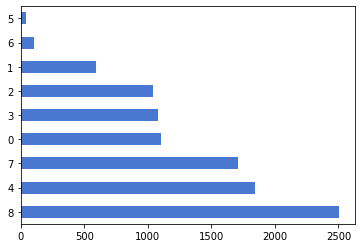

In [27]:
df_audio_text_complete['label'].value_counts().plot.barh()

In [28]:
#df_audio_com = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features.csv')
df_audio_text_subset = df_audio_text_complete[df_audio_complete['label'].isin([0, 1, 2, 3, 4, 5, 6, 7])]
print(df_audio_text_subset.shape)
display(df_audio_text_subset.head())

# change 7 to 2
df_audio_text_subset['label'] = df_audio_text_subset['label'].map({0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 3, 6: 4, 7: 5})
df_audio_text_subset.head()

(7523, 191)


,wav_file,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,7,0.004058,0.007125,0.005279,0.004769,0.039106,-0.002342,0.038814,0.076602,-505.59760,209.24681,-59.997818,27.846205,29.271566,-24.667051,20.793590,2.325920,-13.119522,16.517988,-3.776351,-2.244071,13.624232,-5.743205,1.238892,5.963991,-6.974290,4.645291,3.151937,-5.817239,3.334054,-0.951584,-4.161171,1.812095,-2.130992,-0.346728,0.826099,-4.082858,-0.209607,-0.745588,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,4,0.002222,0.002955,0.002789,0.000982,0.000000,-0.002555,0.005181,0.008782,-578.11743,254.12710,-94.874000,36.807053,30.466867,-29.885138,39.405260,-2.000228,-23.032421,21.992502,-3.662120,1.909014,16.987793,-7.704441,4.252829,4.862872,-5.463178,10.782936,1.001684,-6.983444,3.249188,-2.617306,-1.327329,1.193421,-0.355063,6.476388,-0.620093,-4.656192,1.912605,-2.779434,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
3,Ses01F_script02_1_F003,6,0.007305,0.014885,0.009460,0.011479,0.376471,-0.009935,0.182314,0.310989,-456.53130,181.89484,-36.940600,10.555940,19.524760,-21.111006,11.125594,8.301433,-7.541907,10.034327,1.346077,-0.578147,10.680003,-0.590879,0.332294,3.908607,-4.409512,3.532498,4.177006,-5.387103,1.436181,2.489811,-2.702687,1.237247,-0.614102,-2.839754,-0.015336,-2.215539,-1.240478,1.678997,...,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.572989e-11,4.029952e-11,2.953777e-11,2.192073e-11,1.649043e-11,1.254962e-11,9.651495e-12,7.506788e-12,5.898416e-12,4.684184e-12,3.760937e-12,3.045121e-12,2.496552e-12,2.065624e-12,1.726792e-12,1.459347e-12,1.246079e-12,1.075874e-12,9.378994e-13,8.284760e-13,7.383294e-13,6.658642e-13,6.078275e-13,5.615233e-13,5.253156e-13,4.979084e-13,4.786450e-13,4.670081e-13,what flashlight ?
4,Ses01F_script02_1_F004,7,0.008723,0.014342,0.011216,0.008942,0.319149,-0.002432,0.149445,0.354042,-477.77140,205.39671,-33.927265,13.876922,27.874990,-19.031480,8.801821,5.637193,-15.202250,2.881195,1.592591,-0.890302,6.412141,-3.063155,-0.834140,3.011401,-4.220989,1.789977,1.845688,-5.275592,-0.386954,-2.599862,-6.366372,-0.784313,-1.891397,-1.450458,2.638077,-1.397352,-2.461403,-0.556470,...,0.000030,0.000010,0.000002,7.594971e-07,1.892234e-07,1.946187e-08,8.178607e-10,5.304106e-11,3.702780e-11,3.263240e-11,2.894798e-11,2.567619e-11,2.288821e-11,2.042677e-11,1.825009e-11,1.636880e-11,1.470142e-11,1.322897e-11,1.193674e-11,1.078715e-11,9.778160

,wav_file,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,5,0.004058,0.007125,0.005279,0.004769,0.039106,-0.002342,0.038814,0.076602,-505.59760,209.24681,-59.997818,27.846205,29.271566,-24.667051,20.793590,2.325920,-13.119522,16.517988,-3.776351,-2.244071,13.624232,-5.743205,1.238892,5.963991,-6.974290,4.645291,3.151937,-5.817239,3.334054,-0.951584,-4.161171,1.812095,-2.130992,-0.346728,0.826099,-4.082858,-0.209607,-0.745588,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,2,0.002222,0.002955,0.002789,0.000982,0.000000,-0.002555,0.005181,0.008782,-578.11743,254.12710,-94.874000,36.807053,30.466867,-29.885138,39.405260,-2.000228,-23.032421,21.992502,-3.662120,1.909014,16.987793,-7.704441,4.252829,4.862872,-5.463178,10.782936,1.001684,-6.983444,3.249188,-2.617306,-1.327329,1.193421,-0.355063,6.476388,-0.620093,-4.656192,1.912605,-2.779434,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
3,Ses01F_script02_1_F003,4,0.007305,0.014885,0.009460,0.011479,0.376471,-0.009935,0.182314,0.310989,-456.53130,181.89484,-36.940600,10.555940,19.524760,-21.111006,11.125594,8.301433,-7.541907,10.034327,1.346077,-0.578147,10.680003,-0.590879,0.332294,3.908607,-4.409512,3.532498,4.177006,-5.387103,1.436181,2.489811,-2.702687,1.237247,-0.614102,-2.839754,-0.015336,-2.215539,-1.240478,1.678997,...,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.572989e-11,4.029952e-11,2.953777e-11,2.192073e-11,1.649043e-11,1.254962e-11,9.651495e-12,7.506788e-12,5.898416e-12,4.684184e-12,3.760937e-12,3.045121e-12,2.496552e-12,2.065624e-12,1.726792e-12,1.459347e-12,1.246079e-12,1.075874e-12,9.378994e-13,8.284760e-13,7.383294e-13,6.658642e-13,6.078275e-13,5.615233e-13,5.253156e-13,4.979084e-13,4.786450e-13,4.670081e-13,what flashlight ?
4,Ses01F_script02_1_F004,5,0.008723,0.014342,0.011216,0.008942,0.319149,-0.002432,0.149445,0.354042,-477.77140,205.39671,-33.927265,13.876922,27.874990,-19.031480,8.801821,5.637193,-15.202250,2.881195,1.592591,-0.890302,6.412141,-3.063155,-0.834140,3.011401,-4.220989,1.789977,1.845688,-5.275592,-0.386954,-2.599862,-6.366372,-0.784313,-1.891397,-1.450458,2.638077,-1.397352,-2.461403,-0.556470,...,0.000030,0.000010,0.000002,7.594971e-07,1.892234e-07,1.946187e-08,8.178607e-10,5.304106e-11,3.702780e-11,3.263240e-11,2.894798e-11,2.567619e-11,2.288821e-11,2.042677e-11,1.825009e-11,1.636880e-11,1.470142e-11,1.322897e-11,1.193674e-11,1.078715e-11,9.778160

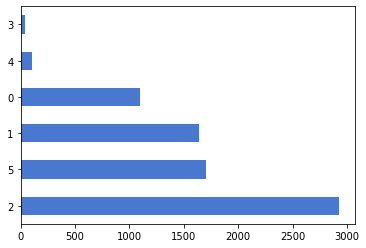

In [29]:
df_audio_text_subset['label'].value_counts().plot.barh()

In [30]:
#df_audio_com = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features.csv')
df_audio_text_fullset = df_audio_text_complete.copy()
# print(df_audio_text_subset.shape)
# display(df_audio_text_subset.head())

# change 7 to 2
df_audio_text_fullset['label'] = df_audio_text_complete['label'].map({0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6})
df_audio_text_fullset.head()

,wav_file,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,5,0.004058,0.007125,0.005279,0.004769,0.039106,-0.002342,0.038814,0.076602,-505.59760,209.24681,-59.997818,27.846205,29.271566,-24.667051,20.793590,2.325920,-13.119522,16.517988,-3.776351,-2.244071,13.624232,-5.743205,1.238892,5.963991,-6.974290,4.645291,3.151937,-5.817239,3.334054,-0.951584,-4.161171,1.812095,-2.130992,-0.346728,0.826099,-4.082858,-0.209607,-0.745588,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,2,0.002222,0.002955,0.002789,0.000982,0.000000,-0.002555,0.005181,0.008782,-578.11743,254.12710,-94.874000,36.807053,30.466867,-29.885138,39.405260,-2.000228,-23.032421,21.992502,-3.662120,1.909014,16.987793,-7.704441,4.252829,4.862872,-5.463178,10.782936,1.001684,-6.983444,3.249188,-2.617306,-1.327329,1.193421,-0.355063,6.476388,-0.620093,-4.656192,1.912605,-2.779434,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
2,Ses01F_script02_1_F002,6,0.030387,0.055945,0.038322,0.041286,0.521739,-0.020362,2.428307,3.673292,-406.39570,177.60760,-5.710657,-1.451121,6.548674,-17.626406,-1.697689,1.800284,-5.931459,-1.682775,-3.597025,3.820365,7.242835,-4.640389,0.683307,6.044654,-2.432811,-0.683775,-2.368052,-9.358154,-3.948695,-2.573265,-5.333622,0.491565,3.656221,4.384229,6.275338,2.754059,-2.132616,-5.650328,...,0.000133,0.000050,0.000026,3.380179e-06,7.534196e-07,3.104391e-07,2.294928e-07,2.058321e-07,1.844692e-07,1.647156e-07,1.475312e-07,1.318072e-07,1.180967e-07,1.058431e-07,9.487106e-08,8.526381e-08,7.675380e-08,6.915774e-08,6.245541e-08,5.651157e-08,5.123750e-08,4.658659e-08,4.241138e-08,3.877426e-08,3.551073e-08,3.261862e-08,3.008002e-08,2.782507e-08,2.583816e-08,2.409658e-08,2.256967e-08,2.124026e-08,2.008774e-08,1.910887e-08,1.828007e-08,1.761333e-08,1.708048e-08,1.669867e-08,1.646482e-08,what ?
3,Ses01F_script02_1_F003,4,0.007305,0.014885,0.009460,0.011479,0.376471,-0.009935,0.182314,0.310989,-456.53130,181.89484,-36.940600,10.555940,19.524760,-21.111006,11.125594,8.301433,-7.541907,10.034327,1.346077,-0.578147,10.680003,-0.590879,0.332294,3.908607,-4.409512,3.532498,4.177006,-5.387103,1.436181,2.489811,-2.702687,1.237247,-0.614102,-2.839754,-0.015336,-2.215539,-1.240478,1.678997,...,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.572989e-11,4.029952e-11,2.953777e-11,2.192073e-11,1.649043e-11,1.254962e-11,9.651495e-12,7.506788e-12,5.898416e-12,4.684184e-12,3.760937e-

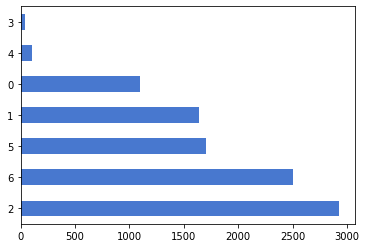

In [31]:
df_audio_text_fullset['label'].value_counts().plot.barh()

In [32]:
df_audio_text_subset.columns[2:-1]

Index(['sig_mean', 'sig_std', 'rmse_mean', 'rmse_std', 'silence', 'harmonic',
       'auto_corr_max', 'auto_corr_std', 'Var_1', 'Var_2',
       ...
       'Var_171', 'Var_172', 'Var_173', 'Var_174', 'Var_175', 'Var_176',
       'Var_177', 'Var_178', 'Var_179', 'Var_180'],
      dtype='object', length=188)

In [33]:
#scalar = StandardScaler()
#df_audio_text_subset[df_audio_text_subset.columns[2:-1]] = scalar.fit_transform(df_audio_text_subset[df_audio_text_subset.columns[2:-1]])
df_audio_text_subset.head()

,wav_file,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,5,0.004058,0.007125,0.005279,0.004769,0.039106,-0.002342,0.038814,0.076602,-505.59760,209.24681,-59.997818,27.846205,29.271566,-24.667051,20.793590,2.325920,-13.119522,16.517988,-3.776351,-2.244071,13.624232,-5.743205,1.238892,5.963991,-6.974290,4.645291,3.151937,-5.817239,3.334054,-0.951584,-4.161171,1.812095,-2.130992,-0.346728,0.826099,-4.082858,-0.209607,-0.745588,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,2,0.002222,0.002955,0.002789,0.000982,0.000000,-0.002555,0.005181,0.008782,-578.11743,254.12710,-94.874000,36.807053,30.466867,-29.885138,39.405260,-2.000228,-23.032421,21.992502,-3.662120,1.909014,16.987793,-7.704441,4.252829,4.862872,-5.463178,10.782936,1.001684,-6.983444,3.249188,-2.617306,-1.327329,1.193421,-0.355063,6.476388,-0.620093,-4.656192,1.912605,-2.779434,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
3,Ses01F_script02_1_F003,4,0.007305,0.014885,0.009460,0.011479,0.376471,-0.009935,0.182314,0.310989,-456.53130,181.89484,-36.940600,10.555940,19.524760,-21.111006,11.125594,8.301433,-7.541907,10.034327,1.346077,-0.578147,10.680003,-0.590879,0.332294,3.908607,-4.409512,3.532498,4.177006,-5.387103,1.436181,2.489811,-2.702687,1.237247,-0.614102,-2.839754,-0.015336,-2.215539,-1.240478,1.678997,...,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.572989e-11,4.029952e-11,2.953777e-11,2.192073e-11,1.649043e-11,1.254962e-11,9.651495e-12,7.506788e-12,5.898416e-12,4.684184e-12,3.760937e-12,3.045121e-12,2.496552e-12,2.065624e-12,1.726792e-12,1.459347e-12,1.246079e-12,1.075874e-12,9.378994e-13,8.284760e-13,7.383294e-13,6.658642e-13,6.078275e-13,5.615233e-13,5.253156e-13,4.979084e-13,4.786450e-13,4.670081e-13,what flashlight ?
4,Ses01F_script02_1_F004,5,0.008723,0.014342,0.011216,0.008942,0.319149,-0.002432,0.149445,0.354042,-477.77140,205.39671,-33.927265,13.876922,27.874990,-19.031480,8.801821,5.637193,-15.202250,2.881195,1.592591,-0.890302,6.412141,-3.063155,-0.834140,3.011401,-4.220989,1.789977,1.845688,-5.275592,-0.386954,-2.599862,-6.366372,-0.784313,-1.891397,-1.450458,2.638077,-1.397352,-2.461403,-0.556470,...,0.000030,0.000010,0.000002,7.594971e-07,1.892234e-07,1.946187e-08,8.178607e-10,5.304106e-11,3.702780e-11,3.263240e-11,2.894798e-11,2.567619e-11,2.288821e-11,2.042677e-11,1.825009e-11,1.636880e-11,1.470142e-11,1.322897e-11,1.193674e-11,1.078715e-11,9.778160

In [34]:
X_audio_text=df_audio_text_subset.drop(columns=['wav_file','label'])
y_audio_text=df_audio_text_subset['label']

In [35]:
y_audio_text.head()

0    5
1    2
3    4
4    5
6    0
Name: label, dtype: int64

In [36]:
emotion_dict_new = {'ang': 0,
                'hap': 1,
                'sad': 2,
                'fea': 3,
                'sur': 4,
                'neu': 5}

emo_keys_new = list(['ang', 'hap', 'sad', 'fea', 'sur', 'neu'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

def display_results(y_test, pred_probs, cm=True):
    pred = np.argmax(pred_probs, axis=-1)
    one_hot_true = one_hot_encoder(y_test, len(pred), len(emotion_dict_new))
    print('Test Set Accuracy =  {0:.3f}'.format(accuracy_score(y_test, pred)))
    print('Test Set F-score =  {0:.3f}'.format(f1_score(y_test, pred, average='macro')))
    print('Test Set Precision =  {0:.3f}'.format(precision_score(y_test, pred, average='macro')))
    print('Test Set Recall =  {0:.3f}'.format(recall_score(y_test, pred, average='macro')))
    if cm:
        plot_confusion_matrix(confusion_matrix(y_test, pred), classes=emo_keys_new)

In [37]:
X_train_val_split, X_test_split, y_train_val_split, y_test_split = train_test_split(X_audio_text,y_audio_text, test_size=0.20,random_state=100,stratify=y_audio_text)

In [38]:
X_train_val_split.head()

,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
166,0.017942,0.031342,0.022258,0.022002,0.403030,-0.005938,0.742587,2.397591,-429.49432,164.03632,-23.189760,6.851655,25.024965,-9.552565,2.042094,-1.172174,-14.276101,0.670471,3.341360,0.092268,2.928437,-0.221531,3.556890,4.070158,-2.151462,1.387083,-0.802092,-4.921184,3.213553,2.703009,-2.254634,2.313682,0.474537,-3.630882,0.864783,2.078516,-0.884945,-1.699253,-1.913960,-0.754907,...,0.000078,0.000028,0.000010,4.628867e-06,1.047630e-06,1.170834e-07,1.709204e-09,4.901892e-11,3.394717e-11,3.041246e-11,2.748746e-11,2.485971e-11,2.257335e-11,2.051539e-11,1.864305e-11,1.697836e-11,1.547756e-11,1.411534e-11,1.289023e-11,1.178548e-11,1.078965e-11,9.899539e-12,9.086948e-12,8.370945e-12,7.723522e-12,7.140971e-12,6.625532e-12,6.162471e-12,5.751158e-12,5.385959e-12,5.065488e-12,4.783916e-12,4.538274e-12,4.329598e-12,4.152392e-12,4.008346e-12,3.893092e-12,3.811359e-12,3.761150e-12,presents ? it was only a trivial little brooch .
3051,0.008716,0.013027,0.011047,0.006900,0.195860,-0.005009,0.114097,0.352914,-491.94540,193.07785,-36.729076,10.882752,30.053465,-18.376696,0.534084,2.210285,-11.872421,0.737834,-6.500321,-11.221124,-0.823760,-4.523369,-4.575129,-0.122309,-0.775073,0.206899,-4.271661,-4.975174,-0.356861,-4.837292,-4.262958,0.878845,-2.292101,-0.846671,2.513476,-0.128088,0.745162,1.970042,1.344700,3.056888,...,0.000025,0.000014,0.000005,1.612021e-06,3.516347e-07,3.030370e-08,1.106159e-09,1.628417e-10,1.396167e-10,1.270728e-10,1.153584e-10,1.039928e-10,9.370433e-11,8.426925e-11,7.566738e-11,6.804501e-11,6.123309e-11,5.512896e-11,4.972380e-11,4.492490e-11,4.066405e-11,3.690770e-11,3.353738e-11,3.060646e-11,2.798329e-11,2.565973e-11,2.362373e-11,2.182037e-11,2.023317e-11,1.884043e-11,1.762554e-11,1.656543e-11,1.564964e-11,1.487238e-11,1.421885e-11,1.368934e-11,1.326825e-11,1.296664e-11,1.278233e-11,oh yeah absolutely . you know and especially b...
28,0.022226,0.065892,0.028078,0.059589,0.751908,0.013184,3.946733,21.534090,-399.85867,97.55426,5.852170,12.156615,18.102240,0.030100,0.248833,-1.614392,-6.232922,-2.151576,-0.161687,2.737938,3.747085,0.953868,3.661918,3.766247,0.436801,1.589752,-1.180943,-4.872811,-1.941888,-1.377714,-3.436214,-2.909748,-1.962951,-0.300011,0.232454,-1.345198,-0.901959,0.097359,0.193014,1.150980,...,0.002978,0.001291,0.000330,1.099311e-04,1.379914e-05,8.292041e-06,7.133601e-07,1.558829e-08,2.390412e-11,1.524686e-11,1.130444e-11,8.531746e-12,6.572208e-12,5.142802e-12,4.083082e-12,3.290661e-12,2.686461e-12,2.216965e-12,1.848100e-12,1.559329e-12,1.326976e-12,1.138692e-12,9.844864e-13,8.616873e-13,7.574133e-13,6.692837e-13,5.980590e-13,5.382131e-13,4.891986e-13,4.437898e-13,4.113193e-13,3.784558e-13,3.514070e-13,3.297014e-13,3.137690e-13,2.982934e-13,2.882208e-13,2.800474e-13,2.746888e-13,okay . is that is that
6823,0.016387,0.025799,0.020630,0.015449,0.233803,-0.006504,0.467644,1.151403,-432.85650,202.01822,-33.683940,-14.513482,19.241781,-13.453171,-5.184056,-2.686533,-14.577132,-3.444175,-1.968779,-1.944344,7.658189,1.879357,-3.164622,0.038420,-3.159185,-3.832730,-2.501854,-3.671763,-2.569216,-4.016309,-4.617719,-2.444710,-4.631723,-3.894447,-0.770353,-2.563013,-0.135067,3.615406,0.051620,-1.428340,...,0.000040,0.000010,0.000003,8.331350e-07,1.094051e-07,1.659063e-08,2.273056e-09,1.481168e-09,1.329155e-09,1.193690e-09,1.074334e-09,9.637594e-10,8.665111e-10,7.790314e-10,7.001697e-10,6.307665e

In [39]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_val_split,y_train_val_split, test_size=0.20,random_state=100,stratify=y_train_val_split)

In [40]:
X_train_split.head()

,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
4549,0.003147,0.007265,0.004119,0.006420,0.290323,-0.007696,0.045525,0.111776,-541.81287,157.54958,-22.169266,22.109842,24.261385,-7.964699,9.781030,-9.237029,-13.747606,10.681236,-2.859840,-6.811216,1.801633,-5.613183,1.320153,3.307938,-5.086665,0.783248,-1.622731,-6.887631,-1.071605,-2.997023,-3.766563,0.178243,-1.403018,0.727649,1.263158,-2.382723,0.759675,3.645043,3.742463,4.582254,...,0.000165,6.813421e-05,4.739329e-05,1.684610e-05,2.799017e-06,9.094237e-08,2.324356e-08,1.878315e-08,1.621756e-08,1.407327e-08,1.232767e-08,1.082293e-08,9.562356e-09,8.473730e-09,7.525477e-09,6.712904e-09,6.005719e-09,5.383338e-09,4.840199e-09,4.363180e-09,3.943792e-09,3.575580e-09,3.247774e-09,2.963438e-09,2.708998e-09,2.484744e-09,2.288432e-09,2.114640e-09,1.961681e-09,1.827339e-09,1.710385e-09,1.608549e-09,1.520133e-09,1.445613e-09,1.382404e-09,1.331320e-09,1.290750e-09,1.261501e-09,1.243558e-09,i m sorry sir .
7921,0.006259,0.011003,0.007821,0.007730,0.337364,-0.005623,0.092080,0.472167,-492.59027,146.34596,-8.497099,27.034056,24.166950,-12.546513,10.933343,6.059605,-9.617927,3.356515,-2.324981,-4.453494,4.540427,-2.065795,-0.348606,4.532716,-0.185177,3.216626,2.522645,-3.990159,-1.698643,-1.884438,-3.253496,-1.522834,-4.681767,-4.604871,-2.180960,-5.059082,-3.987904,-0.439390,-0.804751,-0.176852,...,0.000279,1.231265e-04,3.944791e-05,8.699324e-06,1.184124e-06,9.190524e-08,1.623266e-09,1.155122e-11,5.334261e-13,4.409489e-13,3.898820e-13,3.491105e-13,3.147307e-13,2.838422e-13,2.558925e-13,2.310831e-13,2.088652e-13,1.888241e-13,1.709396e-13,1.550266e-13,1.408012e-13,1.282139e-13,1.168660e-13,1.069682e-13,9.804981e-14,9.011584e-14,8.318266e-14,7.707305e-14,7.175116e-14,6.699471e-14,6.269527e-14,5.887679e-14,5.563321e-14,5.290526e-14,5.064568e-14,4.880756e-14,4.732986e-14,4.627127e-14,4.562551e-14,no so is everyone else in the long run . let s...
4173,0.006476,0.013418,0.008164,0.010634,0.598253,-0.007376,0.147426,0.260881,-546.75775,163.54288,-17.220620,11.304126,33.136730,-8.534730,-4.278367,8.283150,0.357609,-4.434469,-8.694298,-4.376583,1.327891,0.571644,2.974321,-2.431613,-6.760472,1.947958,0.181784,-6.286667,-1.600338,-0.194460,-1.883663,-2.716150,-3.578821,2.663736,2.570171,-6.310481,-2.058319,4.612625,-0.001416,-0.544703,...,0.000044,2.918401e-05,1.052347e-05,1.090679e-06,1.212805e-07,1.064523e-08,6.220263e-10,4.073369e-11,2.400869e-11,1.949949e-11,1.617611e-11,1.355598e-11,1.150151e-11,9.833996e-12,8.460186e-12,7.333699e-12,6.393564e-12,5.598869e-12,4.928621e-12,4.358258e-12,3.870611e-12,3.454233e-12,3.091835e-12,2.783643e-12,2.514340e-12,2.281242e-12,2.079745e-12,1.903872e-12,1.751481e-12,1.619566e-12,1.505798e-12,1.407375e-12,1.323163e-12,1.252210e-12,1.192863e-12,1.145057e-12,1.107337e-12,1.080301e-12,1.063710e-12,and what about me ?
1776,0.002774,0.003962,0.003463,0.001924,0.000000,-0.008621,0.010159,0.039017,-578.48914,221.68886,-30.272835,22.325155,28.419895,-15.964217,21.174692,10.492879,-9.126534,13.336313,1.468090,-0.700225,14.966858,2.827244,1.914232,4.346941,-3.724664,5.282741,4.609201,-5.440726,-0.762987,-2.213033,-2.297667,5.306162,2.050369,2.030790,4.115006,-3.286055,-2.673645,1.892075,-0.014217,0.606964,...,0.000001,4.922699e-07,1.844339e-07,7.203211e-08,9.133749e-09,2.847311e-09,4.985863e-10,1.161634e-11,1.240875e-12,1.957628e-12,2.701685e-12,3.302743e-12,3.741864e-12,4.022885e-12,4.170053e-12,4.218914e

In [41]:
# scalar = StandardScaler()
# X_train_split[X_train_split.columns[:-1]] = scalar.fit_transform(X_train_split[X_train_split.columns[:-1]])
# X_val_split[X_val_split.columns[:-1]] = scalar.transform(X_val_split[X_val_split.columns[:-1]])
# X_test_split[X_test_split.columns[:-1]] = scalar.fit_transform(X_test_split[X_test_split.columns[:-1]])
# #df_audio_text_subset[df_audio_text_subset.columns[2:-1]] = scalar.fit_transform(df_audio_text_subset[df_audio_text_subset.columns[2:-1]])

In [42]:
#X_train_split.head()

In [43]:
X_train_val_split_rf = X_train_val_split.copy()
X_test_split_rf = X_test_split.copy()

In [44]:
scalar = StandardScaler()
X_train_val_split_rf[X_train_val_split_rf.columns[:-1]] = scalar.fit_transform(X_train_val_split_rf[X_train_val_split_rf.columns[:-1]])
X_test_split_rf[X_test_split_rf.columns[:-1]] = scalar.transform(X_test_split_rf[X_test_split_rf.columns[:-1]])

In [45]:
scalar = StandardScaler()
X_train_split[X_train_split.columns[:-1]] = scalar.fit_transform(X_train_split[X_train_split.columns[:-1]])
X_val_split[X_val_split.columns[:-1]] = scalar.transform(X_val_split[X_val_split.columns[:-1]])
X_test_split[X_test_split.columns[:-1]] = scalar.transform(X_test_split[X_test_split.columns[:-1]])
#df_audio_text_subset[df_audio_text_subset.columns[2:-1]] = scalar.fit_transform(df_audio_text_subset[df_audio_text_subset.columns[2:-1]])

In [46]:
#X_train_val_subset, X_test_subset, y_train_val_subset, y_test_subset = train_test_split(df_audio_text_subset,df_audio_text_subset['label'], test_size=0.20,random_state=100,stratify=df_audio_text_subset['label'])

In [47]:
df_audio_text_train_val_subset_rf = df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses01|Ses02|Ses03|Ses04')]
df_audio_text_train_subset = df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses01|Ses02|Ses03')]
df_audio_text_val_subset = df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses04')]
df_audio_text_test_subset = df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses05')]
df_audio_text_test_subset_rf = df_audio_text_test_subset.copy()

In [48]:
#X_train_session_based = df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses01|Ses02|Ses03')]
X_train_session_based = df_audio_text_train_subset.drop(columns=['wav_file','label'])
y_train_session_based = df_audio_text_train_subset['label']

# X_train_session_based = X_train_val_subset[X_train_val_subset['wav_file'].str.contains('Ses01|Ses02|Ses03|Ses04')]
# y_train_session_based = X_train_session_based['label']
# X_train_session_based.drop(columns=['wav_file','label'],inplace=True)

In [49]:
X_test_session_based = df_audio_text_test_subset.drop(columns=['wav_file','label'])
y_test_session_based = df_audio_text_test_subset['label']

# X_test_session_based = X_test_subset.drop(columns=['wav_file','label'])
# #df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses04')]
# y_test_session_based = y_test_subset.copy()
#X_test_session_based.drop(columns=['wav_file','label'],inplace=True)

In [50]:
X_val_session_based = df_audio_text_val_subset.drop(columns=['wav_file','label'])
y_val_session_based = df_audio_text_val_subset['label']

# X_val_session_based = X_train_val_subset[X_train_val_subset['wav_file'].str.contains('Ses05')]
# #df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses05')]
# y_val_session_based = X_val_session_based['label']
# X_val_session_based.drop(columns=['wav_file','label'],inplace=True)
# #X_val_session_based['label']
# #X_val_session_based.drop(columns=['wav_file','label'],inplace=True)

In [59]:
X_train_val_session_based_rf = df_audio_text_train_val_subset_rf.drop(columns=['wav_file','label'])
y_train_val_session_based_rf = df_audio_text_train_val_subset_rf['label']

X_test_session_based_rf = df_audio_text_test_subset_rf.drop(columns=['wav_file','label'])
y_test_session_based_rf = df_audio_text_test_subset_rf['label']

In [51]:
print(X_train_session_based.shape,X_val_session_based.shape,X_test_session_based.shape)

(4339, 189) (1538, 189) (1646, 189)


In [52]:
scalar = StandardScaler()
X_train_session_based[X_train_session_based.columns[:-1]] = scalar.fit_transform(X_train_session_based[X_train_session_based.columns[:-1]])
X_val_session_based[X_val_session_based.columns[:-1]] = scalar.transform(X_val_session_based[X_val_session_based.columns[:-1]])
X_test_session_based[X_test_session_based.columns[:-1]] = scalar.transform(X_test_session_based[X_test_session_based.columns[:-1]])

In [60]:
scalar = StandardScaler()
X_train_val_session_based_rf[X_train_val_session_based_rf.columns[:-1]] = scalar.fit_transform(X_train_val_session_based_rf[X_train_val_session_based_rf.columns[:-1]])
X_test_session_based_rf[X_test_session_based_rf.columns[:-1]] = scalar.transform(X_test_session_based_rf[X_test_session_based_rf.columns[:-1]])

In [53]:
import pandas as pd
import numpy as np
import pickle
import re

import itertools
import xgboost as xgb
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

# features = tfidf.fit_transform(df_text.transcription).toarray()

# labels = df_text.label
# print(features.shape)

In [54]:
output_dir = '/content/drive/My Drive/IEMOCAP/model_outputs'
if not os.path.exists(output_dir): ### If the file directory doesn't already exists,
    os.makedirs(output_dir) ### Make it please

Test Set Accuracy =  0.483
Test Set F-score =  0.277
Test Set Precision =  0.344
Test Set Recall =  0.274
Confusion matrix, without normalization
[[ 72  23 117   0   0   8]
 [ 20  76 201   0   0  30]
 [ 26  25 498   0   0  37]
 [  0   0   7   0   0   1]
 [  2   0  19   0   0   1]
 [  8  20 233   0   0  81]]


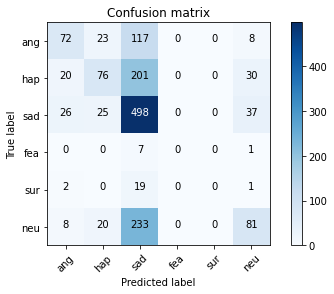

In [55]:
rf_classifier_split = RandomForestClassifier(max_features='sqrt',max_depth= 6,
  min_samples_leaf= 10,
  min_samples_split= 35,
  n_estimators = 600, random_state=100)

rf_classifier_split.fit(X_train_val_split_rf.drop(columns=['transcription']), y_train_val_split)

# Predict
pred_probs = rf_classifier_split.predict_proba(X_test_split_rf.drop(columns=['transcription']))

# Results
display_results(y_test_split, pred_probs)

In [57]:
from datetime import datetime
import joblib
curr_dt_time = datetime.now()
local_filepath = output_dir + '/' + 'model_rf_split' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model_rf_split_0.483_'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.joblib'
joblib.dump(rf_classifier_split,local_filename)

['/content/drive/My Drive/IEMOCAP/model_outputs/model_rf_split/model_rf_split_0.483_2021-10-2414_01_32.970262.joblib']

Test Set Accuracy =  0.446
Test Set F-score =  0.244
Test Set Precision =  0.332
Test Set Recall =  0.255
Confusion matrix, without normalization
[[ 55   8 101   0   0   4]
 [ 20  50 293   0   0  79]
 [ 23  17 546   0   0  38]
 [  0   0   8   0   0   2]
 [  0   1  15   0   0   2]
 [  1   7 293   0   0  83]]


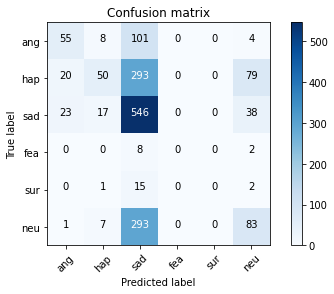

In [61]:
rf_classifier_session_based_rf = RandomForestClassifier(max_features='sqrt', max_depth= 6,
  min_samples_leaf= 10,
  min_samples_split= 35,
  n_estimators = 600, random_state=100 )
rf_classifier_session_based_rf.fit(X_train_val_session_based_rf.drop(columns=['transcription']), y_train_val_session_based_rf)

# Predict
pred_probs_sb_rf = rf_classifier_session_based_rf.predict_proba(X_test_session_based_rf.drop(columns=['transcription']))

# Results
display_results(y_test_session_based_rf, pred_probs_sb_rf)

In [62]:
import joblib
curr_dt_time = datetime.now()
local_filepath = output_dir + '/' + 'model_rf_session_' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model_rf_sb_0.446_'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.joblib'
joblib.dump(rf_classifier_session_based_rf,local_filename)

['/content/drive/My Drive/IEMOCAP/model_outputs/model_rf_session_/model_rf_sb_0.446_2021-10-2414_09_24.993784.joblib']

In [63]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.utils.class_weight import compute_class_weight
import itertools
from IPython.display import display

%matplotlib inline

In [64]:
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, Conv2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [65]:
X_train_split_cnn = X_train_split.drop(columns=['transcription'])
X_val_split_cnn = X_val_split.drop(columns=['transcription'])
X_test_split_cnn = X_test_split.drop(columns=['transcription'])

In [66]:
X_val_split_cnn.head()

,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,...,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180
8590,-0.517200,-0.553703,-0.526915,-0.567047,0.152225,-0.060034,-0.226755,-0.211107,-0.652346,0.128974,0.599672,0.423670,-0.706639,-0.397358,0.476520,0.143170,-0.491456,1.205867,1.561736,0.158579,0.592471,0.338025,-1.054863,0.653238,0.980661,0.188708,0.913918,0.544219,0.158199,0.860328,-0.105486,0.042206,0.981949,-0.313124,-0.910102,-0.560600,-1.147115,-0.820620,0.165801,-0.038394,...,-0.134356,-0.125688,-0.116273,-0.091719,-0.070567,-0.060017,-0.058019,-0.057867,-0.069203,-0.074515,-0.074252,-0.074487,-0.074817,-0.075166,-0.075508,-0.075833,-0.076136,-0.076417,-0.076677,-0.076916,-0.077137,-0.077339,-0.077526,-0.077697,-0.077853,-0.077999,-0.078130,-0.078250,-0.078360,-0.078459,-0.078550,-0.078631,-0.078703,-0.078767,-0.078825,-0.078872,-0.078911,-0.078943,-0.078968,-0.078982
2223,-0.596303,-0.619845,-0.608446,-0.613573,-0.652463,-0.091410,-0.229821,-0.217227,-1.372464,1.043095,0.710458,-0.395662,-1.089156,-0.009888,0.940294,1.354219,0.353271,0.571796,0.825634,0.534734,0.859086,0.516827,-0.493232,0.723492,0.820940,-0.348990,-0.245242,-0.333139,-0.096285,0.938142,0.181414,-0.168769,0.592981,0.636726,0.771132,0.695133,-0.095487,-0.164112,0.055673,-0.193015,...,-0.136449,-0.127446,-0.118322,-0.092710,-0.070846,-0.060092,-0.058033,-0.057868,-0.069206,-0.074539,-0.074280,-0.074516,-0.074848,-0.075200,-0.075543,-0.075868,-0.076172,-0.076454,-0.076714,-0.076954,-0.077175,-0.077377,-0.077564,-0.077735,-0.077892,-0.078038,-0.078169,-0.078290,-0.078400,-0.078499,-0.078590,-0.078670,-0.078743,-0.078807,-0.078865,-0.078912,-0.078951,-0.078983,-0.079008,-0.079022
7433,-0.565981,-0.577196,-0.574881,-0.560678,0.265256,-0.084096,-0.227590,-0.212351,-0.909714,-0.768697,2.008332,0.196508,0.144706,1.612517,-0.462489,-0.001571,1.319967,0.070764,0.901555,0.221823,-0.442653,1.527127,1.130224,0.177850,1.008037,-0.118508,0.667141,1.441857,-0.417811,0.399931,1.788814,0.279333,-0.477943,-0.262518,0.132859,-0.136630,-1.408617,-1.143632,-0.122815,-0.756186,...,-0.134951,-0.125267,-0.116514,-0.091596,-0.070510,-0.059978,-0.058022,-0.057866,-0.069206,-0.074538,-0.074276,-0.074511,-0.074842,-0.075192,-0.075534,-0.075859,-0.076162,-0.076443,-0.076703,-0.076942,-0.077163,-0.077365,-0.077552,-0.077722,-0.077879,-0.078024,-0.078156,-0.078276,-0.078386,-0.078485,-0.078576,-0.078656,-0.078729,-0.078793,-0.078850,-0.078897,-0.078937,-0.078969,-0.078993,-0.079008
5878,0.041810,0.406115,0.077043,0.720687,1.179393,-0.088288,0.006805,-0.068955,0.628466,-1.329461,-0.228347,-0.913493,0.901275,0.707141,-1.741048,-0.295659,1.496020,-1.107764,-0.753895,0.294138,-0.056929,0.837505,-0.210808,-1.430481,0.004384,-0.256993,-0.271677,0.937591,0.708408,0.614356,0.465728,-1.515497,-1.607835,0.521668,0.855020,0.213790,0.196312,-0.604157,-1.004331,0.071045,...,-0.115948,-0.110643,-0.103940,-0.085019,-0.065375,-0.057805,-0.057324,-0.054655,0.070991,0.816946,0.826233,0.837806,0.848587,0.858114,0.866434,0.873648,0.879895,0.885326,0.890106,0.894292,0.897945,0.901185,0.904071,0.906613,0.908833,0.910893,0.912674,0.914280,0.915687,0.916974,0.918084,0.919092,0.919929,0.920696,0.921368,0.921932,0.922383,0.922731,0.923047,0.923198
2777,-0.369609,-0.326169,-0.369194,-0.264027,1.254374,-0.029031,-0.202428,-0.183773,-0.410011,-0.079061,1.310491,-0.039988,-0.417625,0.599252,-0.045567,1.519571,2.441670,0.023185,-0.139101,0.853360,0.426451,0.471819,0.091761,-0.297589,0.297946,0.925332,0.2

In [67]:
X_train_split_cnn = X_train_split_cnn.values.reshape(X_train_split_cnn.shape[0],X_train_split_cnn.shape[1],1)
X_val_split_cnn = X_val_split_cnn.values.reshape(X_val_split_cnn.shape[0],X_val_split_cnn.shape[1],1)
X_test_split_cnn = X_test_split_cnn.values.reshape(X_test_split_cnn.shape[0],X_test_split_cnn.shape[1],1)

In [68]:
### Try CNN Models

In [69]:
model_1d_split = Sequential()
model_1d_split.add(Conv1D(254,5,padding='same',input_shape=(X_train_split_cnn[0].shape))) # there are 8 features
model_1d_split.add(Activation('relu'))
model_1d_split.add(Conv1D(128,5,padding='same'))
model_1d_split.add(Dropout(0.1))
model_1d_split.add(MaxPooling1D(pool_size=(8)))
model_1d_split.add(Conv1D(128,5,padding='same'))
model_1d_split.add(Activation('relu'))
model_1d_split.add(Conv1D(128,5,padding='same'))
model_1d_split.add(Activation('relu'))
model_1d_split.add(Flatten())
model_1d_split.add(Dense(6))
model_1d_split.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)

In [70]:
model_1d_split.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 188, 254)          1524      
_________________________________________________________________
activation (Activation)      (None, 188, 254)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 188, 128)          162688    
_________________________________________________________________
dropout (Dropout)            (None, 188, 128)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 23, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 23, 128)           82048     
_________________________________________________________________
activation_1 (Activation)    (None, 23, 128)           0

In [71]:
def plot_history(history_model):
    # summarize history for accuracy
    plt.plot(history_model.history['sparse_categorical_accuracy'])
    plt.plot(history_model.history['val_sparse_categorical_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('categorical accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history_model.history['loss'])
    plt.plot(history_model.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [72]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [73]:
from datetime import datetime

In [74]:
output_dir

'/content/drive/My Drive/IEMOCAP/model_outputs'

In [75]:
curr_dt_time = datetime.now()
local_filepath = output_dir+'/'+'model_init_1d' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'
#print(filepath)
model_checkpoint = ModelCheckpoint(filepath=local_filename,
                                  save_weights_only=False)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [76]:
model_1d_split.compile(loss='sparse_categorical_crossentropy',optimizer=opt, metrics=['sparse_categorical_accuracy'])

In [77]:
model_1d_split_hist = model_1d_split.fit(X_train_split_cnn, y_train_split, batch_size=32,epochs=30, validation_data=(X_val_split_cnn,y_val_split),callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
151/151 [==============================] - 18s 8ms/step - loss: 1.3400 - sparse_categorical_accuracy: 0.4198 - val_loss: 1.3455 - val_sparse_categorical_accuracy: 0.4045
Epoch 2/30
151/151 [==============================] - 1s 6ms/step - loss: 1.2581 - sparse_categorical_accuracy: 0.4701 - val_loss: 1.2668 - val_sparse_categorical_accuracy: 0.4734
Epoch 3/30
151/151 [==============================] - 1s 6ms/step - loss: 1.2150 - sparse_categorical_accuracy: 0.4950 - val_loss: 1.2878 - val_sparse_categorical_accuracy: 0.4643

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 4/30
151/151 [==============================] - 1s 6ms/step - loss: 1.1420 - sparse_categorical_accuracy: 0.5241 - val_loss: 1.2454 - val_sparse_categorical_accuracy: 0.4917
Epoch 5/30
151/151 [==============================] - 1s 6ms/step - loss: 1.1166 - sparse_categorical_accuracy: 0.5413 - val_loss: 1.2438 - val_sparse_categorical_accuracy: 0.4875

Epoch 00005: Red

In [78]:
model_1d_split_hist.history

{'loss': [1.3400145769119263,
  1.2581318616867065,
  1.2150107622146606,
  1.1420024633407593,
  1.1165924072265625,
  1.0982029438018799,
  1.0946125984191895,
  1.0962516069412231],
 'lr': [0.001,
  0.001,
  0.001,
  0.000100000005,
  0.000100000005,
  1.0000001e-05,
  1.0000001e-06,
  1.0000001e-07],
 'sparse_categorical_accuracy': [0.4198172092437744,
  0.4700872600078583,
  0.4950145483016968,
  0.5240963697433472,
  0.541337788105011,
  0.5475695729255676,
  0.5488159656524658,
  0.5469464063644409],
 'val_loss': [1.3455278873443604,
  1.2668195962905884,
  1.2878413200378418,
  1.2453575134277344,
  1.2437903881072998,
  1.2444976568222046,
  1.2444905042648315,
  1.244490146636963],
 'val_sparse_categorical_accuracy': [0.4044850468635559,
  0.47342193126678467,
  0.4642857015132904,
  0.4916943609714508,
  0.487541526556015,
  0.4883720874786377,
  0.4883720874786377,
  0.4883720874786377]}

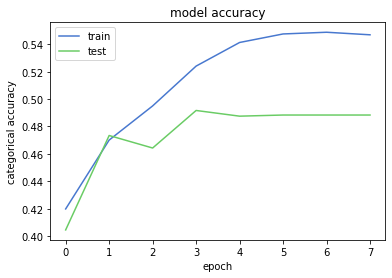

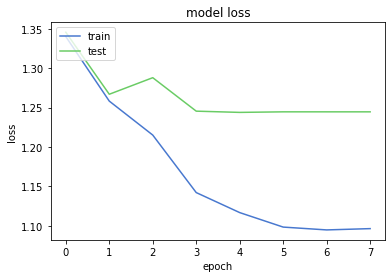

In [79]:
plot_history(model_1d_split_hist)

In [85]:
pred_y_1d_split = model_1d_split.predict(X_test_split_cnn)

In [86]:
pred_y_1d_split.shape

(1505, 6)

In [87]:
#pred_y_split = np.argmax(pred_y_split,axis=1)

In [88]:
#pred_y_split.shape

In [89]:
#pred_y_split.shape

Test Set Accuracy =  0.493
Test Set F-score =  0.306
Test Set Precision =  0.337
Test Set Recall =  0.299
Confusion matrix, without normalization
[[ 83  22 107   0   0   8]
 [ 20 116 150   0   0  41]
 [ 37  43 433   0   0  73]
 [  1   1   5   0   0   1]
 [  1   3  16   0   0   2]
 [  6  42 184   0   0 110]]


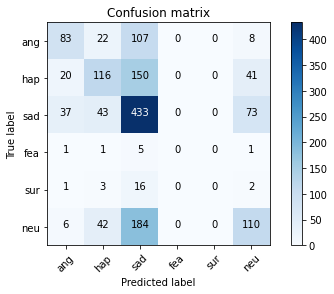

In [90]:
display_results(y_test_split, pred_y_1d_split)

In [91]:
#from sklearn.metrics import balanced_accuracy_score

In [92]:
#balanced_accuracy_score(y_test_split, np.argmax(pred_y_split,axis=1))

In [93]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [94]:
from datetime import datetime

In [95]:
curr_dt_time = datetime.now()
local_filepath = output_dir+'/'+'model_init_2d' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_') +'.h5'
#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=False)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [96]:
X_train_split_cnn_2d = np.expand_dims(X_train_split_cnn, -1)
X_val_split_cnn_2d = np.expand_dims(X_val_split_cnn, -1)
X_test_split_cnn_2d = np.expand_dims(X_test_split_cnn, -1)

In [97]:
X_train_split_cnn.shape

(4814, 188, 1)

In [98]:
#ip = tf.keras.layers.Input(shape=X_train_split_cnn[0].shape)

model_split_2d = Sequential()
model_split_2d.add(Conv2D(256,5,padding='same',input_shape=(X_train_split_cnn.shape[1],1,1))) #(x_train_mfcc_cnn_2d[0].shape))) # there are 8 features
model_split_2d.add(Activation('relu'))
model_split_2d.add(Conv2D(128,5,padding='same'))
model_split_2d.add(Dropout(0.1))
#model_mfcc_2d.add(MaxPooling2D(pool_size=(2)))
model_split_2d.add(Conv2D(128,5,padding='same'))
model_split_2d.add(Activation('relu'))
model_split_2d.add(Flatten())
model_split_2d.add(Dense(6))
model_split_2d.add(Activation('softmax'))
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)

In [99]:
model_split_2d.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['sparse_categorical_accuracy'])
model_history_split_2d = model_split_2d.fit(X_train_split_cnn_2d, 
              y_train_split,
              epochs=30,
              batch_size=32,
              validation_data=(X_val_split_cnn_2d, y_val_split),
              callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
151/151 [==============================] - 3s 17ms/step - loss: 1.3156 - sparse_categorical_accuracy: 0.4420 - val_loss: 1.2769 - val_sparse_categorical_accuracy: 0.4751
Epoch 2/30
151/151 [==============================] - 2s 15ms/step - loss: 1.2224 - sparse_categorical_accuracy: 0.4925 - val_loss: 1.2510 - val_sparse_categorical_accuracy: 0.4601
Epoch 3/30
151/151 [==============================] - 2s 15ms/step - loss: 1.1805 - sparse_categorical_accuracy: 0.5083 - val_loss: 1.3164 - val_sparse_categorical_accuracy: 0.4684

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 4/30
151/151 [==============================] - 2s 15ms/step - loss: 1.1057 - sparse_categorical_accuracy: 0.5488 - val_loss: 1.2238 - val_sparse_categorical_accuracy: 0.4875
Epoch 5/30
151/151 [==============================] - 2s 15ms/step - loss: 1.0760 - sparse_categorical_accuracy: 0.5571 - val_loss: 1.2320 - val_sparse_categorical_accuracy: 0.4925

Epoch 00005:

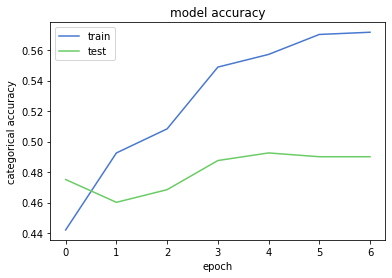

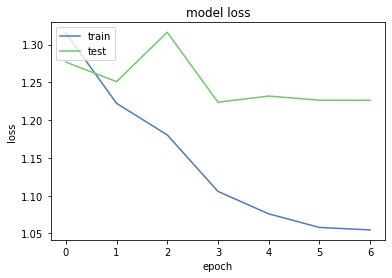

In [100]:
plot_history(model_history_split_2d)

In [101]:
pred_y_2d_split = model_split_2d.predict(X_test_split_cnn_2d)

Test Set Accuracy =  0.495
Test Set F-score =  0.312
Test Set Precision =  0.334
Test Set Recall =  0.305
Confusion matrix, without normalization
[[ 82  28  97   0   1  12]
 [ 24 127 139   0   0  37]
 [ 41  53 407   0   0  85]
 [  0   1   6   0   0   1]
 [  1   4  11   0   0   6]
 [ 11  32 170   0   0 129]]


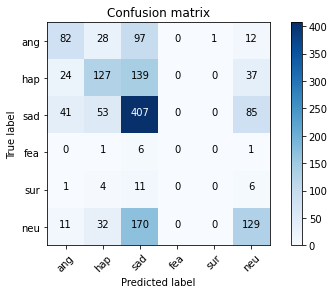

In [102]:
display_results(y_test_split, pred_y_2d_split)

In [103]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [104]:
from transformers import BertTokenizer, TFBertModel, BertConfig, RobertaTokenizer, TFRobertaModel, RobertaConfig, DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [105]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_dbert_split = tokenizer_class.from_pretrained(pretrained_weights)
model_dbert_split = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [106]:
max_val = 0
for sent in (X_train_split['transcription'].tolist() + X_test_split['transcription'].tolist() + X_val_split['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_dbert_split.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 114


In [107]:
from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [108]:
MODEL_NAME = 'distilbert-base-uncased'

In [109]:
MAX_LENGTH = 114

tokenizer_dbert_split = DistilBertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

def tokenize(sentences, tokenizer):
    input_ids, input_masks, input_segments = [], [], []
    for sentence in tqdm(sentences):
        inputs = tokenizer.encode_plus(sentence, 
                                       add_special_tokens=True, 
                                       max_length=MAX_LENGTH, 
                                       pad_to_max_length=True, 
                                       return_attention_mask=True, 
                                       return_token_type_ids=True, 
                                       truncation=True)
        input_ids.append(inputs['input_ids'])
        input_masks.append(inputs['attention_mask'])
        input_segments.append(inputs['token_type_ids'])        
        
    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [110]:
X_train_dbert_split_text = tokenize(X_train_split['transcription'], tokenizer_dbert_split)
X_test_dbert_split_text = tokenize(X_test_split['transcription'], tokenizer_dbert_split)
X_val_dbert_split_text = tokenize(X_val_split['transcription'], tokenizer_dbert_split)

100%|██████████| 1204/1204 [00:00<00:00, 2396.24it/s]


In [111]:
config_db_split = DistilBertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
DistilBERT_split = TFDistilBertModel.from_pretrained(MODEL_NAME, config=config_db_split)

input_ids_in_db_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_db_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_db_split = DistilBERT_split(input_ids = input_ids_in_db_split, attention_mask = input_masks_in_db_split)[0]
X_db_split = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_db_split)
X_db_split = tf.keras.layers.GlobalMaxPool1D()(X_db_split)
X_db_split = tf.keras.layers.Dense(64, activation='relu')(X_db_split)
X_db_split = tf.keras.layers.Dropout(0.2)(X_db_split)
X_db_split = tf.keras.layers.Dense(6, activation='softmax')(X_db_split)

model_dbert_split = tf.keras.Model(inputs=[input_ids_in_db_split, input_masks_in_db_split], outputs = X_db_split)

for layer in model_dbert_split.layers[:3]:
    layer.trainable = False

model_dbert_split.summary()

Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'vocab_layer_norm', 'vocab_projector', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_distil_bert_model (TFDistilB TFBaseModelOutput(la 66362880    input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 114, 256)     918528      tf_distil_bert_model[0][13]  

In [112]:
curr_dt_time = datetime.now()
local_filepath = output_dir+'/'+'model_init_dbert_split' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'
#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [113]:
y_val_split.shape

(1204,)

In [114]:
model_dbert_split.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_dbert_split = model_dbert_split.fit(X_train_dbert_split_text, 
                    y_train_split, 
                    epochs = 30,
                    batch_size=32, 
                    validation_data=(X_val_dbert_split_text, y_val_split), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
151/151 [==============================] - 29s 136ms/step - loss: 1.3021 - sparse_categorical_accuracy: 0.4574 - val_loss: 1.2002 - val_sparse_categorical_accuracy: 0.5008
Epoch 2/30
151/151 [==============================] - 19s 123ms/step - loss: 1.1506 - sparse_categorical_accuracy: 0.5266 - val_loss: 1.1384 - val_sparse_categorical_accuracy: 0.5191
Epoch 3/30
151/151 [==============================] - 19s 124ms/step - loss: 1.0824 - sparse_categorical_accuracy: 0.5600 - val_loss: 1.0996 - val_sparse_categorical_accuracy: 0.5440
Epoch 4/30
151/151 [==============================] - 19s 123ms/step - loss: 1.0149 - sparse_categorical_accuracy: 0.5941 - val_loss: 1.0629 - val_sparse_categorical_accuracy: 0.5822
Epoch 5/30
151/151 [==============================] - 19s 124ms/step - loss: 0.9567 - sparse_categorical_accuracy: 0.6194 - val_loss: 1.0487 - val_sparse_categorical_accuracy: 0.5781
Epoch 6/30
151/151 [==============================] - 19s 123ms/step - loss: 0.8870 -

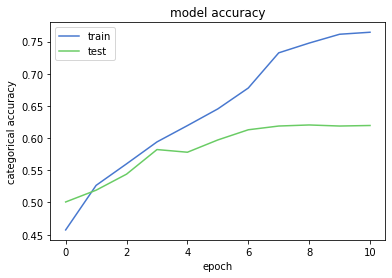

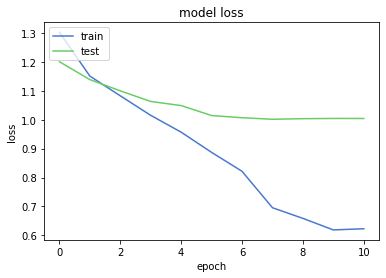

In [115]:
plot_history(model_history_dbert_split)

In [116]:
pred_y_dbert_split = model_dbert_split.predict(X_test_dbert_split_text)

Test Set Accuracy =  0.612
Test Set F-score =  0.451
Test Set Precision =  0.457
Test Set Recall =  0.452
Confusion matrix, without normalization
[[103   9  83   0   9  16]
 [  7 217  59   0   3  41]
 [ 46  39 423   0   3  75]
 [  0   3   3   0   0   2]
 [  2   7   3   0   8   2]
 [ 10  41 114   0   7 170]]


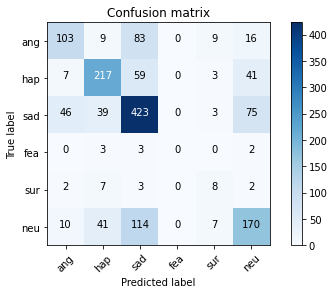

In [117]:
display_results(y_test_split, pred_y_dbert_split)

In [118]:
# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_bert_split = tokenizer_class.from_pretrained(pretrained_weights)
model_bert_split = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [119]:
max_val = 0
for sent in (X_train_split['transcription'].tolist() + X_test_split['transcription'].tolist() + X_val_split['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_bert_split.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 114


In [120]:
from transformers import BertTokenizer, BertConfig, TFBertModel, DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [121]:
MODEL_NAME = 'bert-base-uncased'

In [122]:
MAX_LENGTH = 114

tokenizer_bert_split = BertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

# def tokenize(sentences, tokenizer):
#     input_ids, input_masks, input_segments = [], [], []
#     for sentence in tqdm(sentences):
#         inputs = tokenizer.encode_plus(sentence, 
#                                        add_special_tokens=True, 
#                                        max_length=MAX_LENGTH, 
#                                        pad_to_max_length=True, 
#                                        return_attention_mask=True, 
#                                        return_token_type_ids=True, 
#                                        truncation=True)
#         input_ids.append(inputs['input_ids'])
#         input_masks.append(inputs['attention_mask'])
#         input_segments.append(inputs['token_type_ids'])        
        
#     return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [123]:
X_train_bert_split_text = tokenize(X_train_split['transcription'], tokenizer_bert_split)
X_test_bert_split_text = tokenize(X_test_split['transcription'], tokenizer_bert_split)
X_val_bert_split_text = tokenize(X_val_split['transcription'], tokenizer_bert_split)

100%|██████████| 1204/1204 [00:00<00:00, 2430.22it/s]


In [124]:
config_bert_split = BertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
BERT_split = TFBertModel.from_pretrained(MODEL_NAME, config=config_bert_split)

input_ids_in_bert_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_bert_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_bert_split = BERT_split(input_ids = input_ids_in_bert_split, attention_mask = input_masks_in_bert_split)[0]
X_bert_split = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_bert_split)
X_bert_split = tf.keras.layers.GlobalMaxPool1D()(X_bert_split)
X_bert_split = tf.keras.layers.Dense(64, activation='relu')(X_bert_split)
X_bert_split = tf.keras.layers.Dropout(0.2)(X_bert_split)
X_bert_split = tf.keras.layers.Dense(6, activation='softmax')(X_bert_split)

model_bert_split = tf.keras.Model(inputs=[input_ids_in_bert_split, input_masks_in_bert_split], outputs = X_bert_split)

for layer in model_bert_split.layers[:3]:
    layer.trainable = False

model_bert_split.summary()

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 109482240   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 114, 256)     918528      tf_bert_model[0][25]       

In [125]:
curr_dt_time = datetime.now()
local_filepath = output_dir+'/'+'model_init_bert_split' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [126]:
y_val_split.shape

(1204,)

In [127]:
model_bert_split.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_bert_split = model_bert_split.fit(X_train_bert_split_text, 
                    y_train_split, 
                    epochs = 25,
                    batch_size=32, 
                    validation_data=(X_val_bert_split_text, y_val_split), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/25
151/151 [==============================] - 50s 246ms/step - loss: 1.2831 - sparse_categorical_accuracy: 0.4612 - val_loss: 1.1461 - val_sparse_categorical_accuracy: 0.5216
Epoch 2/25
151/151 [==============================] - 34s 228ms/step - loss: 1.1268 - sparse_categorical_accuracy: 0.5465 - val_loss: 1.1204 - val_sparse_categorical_accuracy: 0.5266
Epoch 3/25
151/151 [==============================] - 34s 228ms/step - loss: 1.0480 - sparse_categorical_accuracy: 0.5735 - val_loss: 1.0683 - val_sparse_categorical_accuracy: 0.5731
Epoch 4/25
151/151 [==============================] - 34s 228ms/step - loss: 0.9627 - sparse_categorical_accuracy: 0.6188 - val_loss: 1.0218 - val_sparse_categorical_accuracy: 0.5914
Epoch 5/25
151/151 [==============================] - 34s 228ms/step - loss: 0.8800 - sparse_categorical_accuracy: 0.6521 - val_loss: 0.9899 - val_sparse_categorical_accuracy: 0.6055
Epoch 6/25
151/151 [==============================] - 34s 228ms/step - loss: 0.8220 -

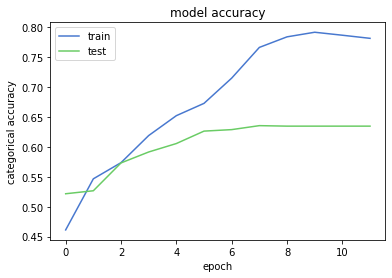

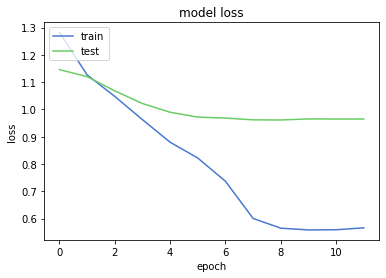

In [128]:
plot_history(model_history_bert_split)

In [129]:
pred_y_bert_split = model_bert_split.predict(X_test_bert_split_text)

Test Set Accuracy =  0.618
Test Set F-score =  0.513
Test Set Precision =  0.547
Test Set Recall =  0.496
Confusion matrix, without normalization
[[117   8  76   0   5  14]
 [  6 224  52   1   4  40]
 [ 53  35 417   0   2  79]
 [  0   2   3   2   0   1]
 [  3   6   4   0   7   2]
 [ 10  44 118   1   6 163]]


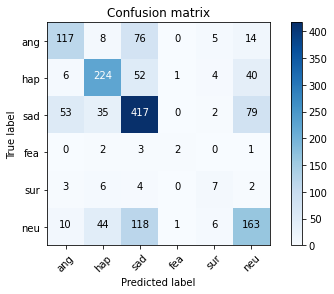

In [130]:
display_results(y_test_split, pred_y_bert_split)

In [131]:
from transformers import RobertaTokenizer, TFRobertaModel, RobertaConfig, DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [132]:
# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

#Want RoBERTa instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.RobertaModel, ppb.RobertaTokenizer, 'roberta-base')

# Load pretrained model/tokenizer
tokenizer_roberta_split = tokenizer_class.from_pretrained(pretrained_weights)
model_roberta_split = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [133]:
max_val = 0
for sent in (X_train_split['transcription'].tolist() + X_test_split['transcription'].tolist() + X_val_split['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_roberta_split.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 119


In [134]:
from transformers import RobertaTokenizer, TFRobertaModel, RobertaConfig, DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [135]:
MODEL_NAME = 'roberta-base'

In [136]:
MAX_LENGTH = 119

tokenizer_roberta_split = RobertaTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

# def tokenize(sentences, tokenizer):
#     input_ids, input_masks, input_segments = [], [], []
#     for sentence in tqdm(sentences):
#         inputs = tokenizer.encode_plus(sentence, 
#                                        add_special_tokens=True, 
#                                        max_length=MAX_LENGTH, 
#                                        pad_to_max_length=True, 
#                                        return_attention_mask=True, 
#                                        return_token_type_ids=True, 
#                                        truncation=True)
#         input_ids.append(inputs['input_ids'])
#         input_masks.append(inputs['attention_mask'])
#         input_segments.append(inputs['token_type_ids'])        
        
#     return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [137]:
X_train_roberta_split_text = tokenize(X_train_split['transcription'], tokenizer_roberta_split)
X_test_roberta_split_text = tokenize(X_test_split['transcription'], tokenizer_roberta_split)
X_val_roberta_split_text = tokenize(X_val_split['transcription'], tokenizer_roberta_split)

100%|██████████| 1204/1204 [00:00<00:00, 4146.40it/s]


In [138]:
config_roberta_split = RobertaConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
RoBERTa_split = TFRobertaModel.from_pretrained(MODEL_NAME, config=config_roberta_split)

input_ids_in_roberta_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_roberta_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_roberta_split = RoBERTa_split(input_ids = input_ids_in_roberta_split, attention_mask = input_masks_in_roberta_split)[0]
X_roberta_split = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_roberta_split)
X_roberta_split = tf.keras.layers.GlobalMaxPool1D()(X_roberta_split)
X_roberta_split = tf.keras.layers.Dense(64, activation='relu')(X_roberta_split)
X_roberta_split = tf.keras.layers.Dropout(0.2)(X_roberta_split)
X_roberta_split = tf.keras.layers.Dense(6, activation='softmax')(X_roberta_split)

model_roberta_split = tf.keras.Model(inputs=[input_ids_in_roberta_split, input_masks_in_roberta_split], outputs = X_roberta_split)

for layer in model_roberta_split.layers[:3]:
    layer.trainable = False

model_roberta_split.summary()

Downloading:   0%|          | 0.00/627M [00:00<?, ?B/s]

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 119)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 119)]        0                                            
__________________________________________________________________________________________________
tf_roberta_model (TFRobertaMode TFBaseModelOutputWit 124645632   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 119, 256)     918528      tf_roberta_model[0][25]    

In [139]:
curr_dt_time = datetime.now()
local_filepath = output_dir + '/' + 'model_init_roberta_split' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [140]:
y_val_split.shape

(1204,)

In [141]:
model_roberta_split.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_roberta_split = model_roberta_split.fit(X_train_roberta_split_text, 
                    y_train_split, 
                    epochs = 30,
                    batch_size=32, 
                    validation_data=(X_val_roberta_split_text, y_val_split), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
151/151 [==============================] - 51s 253ms/step - loss: 1.4108 - sparse_categorical_accuracy: 0.3936 - val_loss: 1.3074 - val_sparse_categorical_accuracy: 0.4452
Epoch 2/30
151/151 [==============================] - 35s 233ms/step - loss: 1.2249 - sparse_categorical_accuracy: 0.4909 - val_loss: 1.1638 - val_sparse_categorical_accuracy: 0.5249
Epoch 3/30
151/151 [==============================] - 35s 233ms/step - loss: 1.1450 - sparse_categorical_accuracy: 0.5287 - val_loss: 1.1220 - val_sparse_categorical_accuracy: 0.5415
Epoch 4/30
151/151 [==============================] - 35s 232ms/step - loss: 1.0661 - sparse_categorical_accuracy: 0.5596 - val_loss: 1.1072 - val_sparse_categorical_accuracy: 0.5482
Epoch 5/30
151/151 [==============================] - 35s 233ms/step - loss: 0.9858 - sparse_categorical_accuracy: 0.5980 - val_loss: 1.0619 - val_sparse_categorical_accuracy: 0.5723
Epoch 6/30
151/151 [==============================] - 35s 233ms/step - loss: 0.9326 -

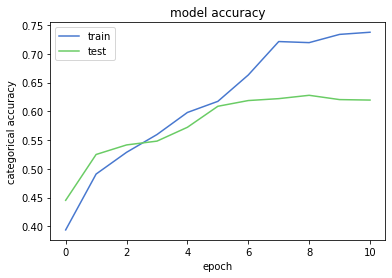

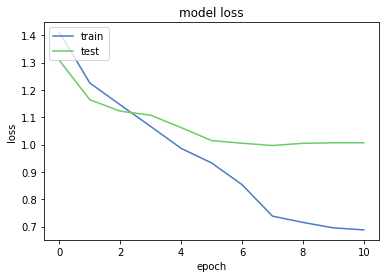

In [142]:
plot_history(model_history_roberta_split)

In [143]:
pred_y_roberta_split = model_roberta_split.predict(X_test_roberta_split_text)

Test Set Accuracy =  0.613
Test Set F-score =  0.442
Test Set Precision =  0.455
Test Set Recall =  0.441
Confusion matrix, without normalization
[[101  12  91   0   4  12]
 [  6 231  61   0   5  24]
 [ 42  38 444   0   2  60]
 [  0   2   4   0   1   1]
 [  4   5   5   0   7   1]
 [ 14  55 126   0   8 139]]


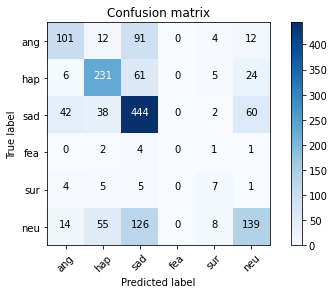

In [144]:
display_results(y_test_split, pred_y_roberta_split)

In [145]:
#Session based

In [146]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.utils.class_weight import compute_class_weight
import itertools
from IPython.display import display

%matplotlib inline

In [147]:
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, Conv2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [148]:
X_train_session_based_cnn = X_train_session_based.drop(columns=['transcription'])
X_val_session_based_cnn = X_val_session_based.drop(columns=['transcription'])
X_test_session_based_cnn = X_test_session_based.drop(columns=['transcription'])

In [149]:
X_val_session_based_cnn.head()

,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,...,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180
5764,-0.436182,-0.472044,-0.443496,-0.490531,0.566068,-0.110364,-0.225381,-0.209810,-0.761760,0.412293,0.507816,0.121603,0.093636,-0.171942,-0.034960,0.372095,-0.908483,0.166103,1.817915,0.007076,-0.850946,0.217815,0.079537,1.019894,1.397147,0.268078,0.967398,1.063622,0.790388,2.187550,0.522038,-1.200710,0.180118,1.142280,0.716764,0.852517,1.541597,2.067811,0.734176,0.623854,...,-0.134584,-0.126314,-0.119409,-0.099397,-0.082448,-0.072643,-0.070919,-0.071098,-0.069570,-0.032218,-0.033313,-0.034093,-0.034682,-0.035152,-0.035541,-0.035870,-0.036154,-0.036403,-0.036622,-0.036817,-0.036991,-0.037148,-0.037289,-0.037417,-0.037532,-0.037637,-0.037732,-0.037819,-0.037897,-0.037968,-0.038031,-0.038088,-0.038139,-0.038184,-0.038222,-0.038255,-0.038283,-0.038305,-0.038321,-0.038330
5765,-0.160260,-0.205467,-0.166244,-0.242192,-0.097160,-0.051292,-0.197900,-0.193822,0.102337,0.202745,-0.396832,-0.531378,0.125033,-0.296757,-0.253364,0.043684,-0.881465,-0.006464,1.313719,1.082428,0.559055,-0.113963,-2.102506,0.027070,1.250025,-0.633778,0.570934,1.455700,-0.275564,0.265044,-0.133178,-2.086701,-1.215777,-0.990318,-2.675026,-0.851642,1.057717,0.588040,1.195085,2.339696,...,-0.130906,-0.119153,-0.106028,-0.091549,-0.081018,-0.072406,-0.070872,-0.071092,-0.069452,-0.031963,-0.033039,-0.033806,-0.034386,-0.034849,-0.035232,-0.035557,-0.035837,-0.036082,-0.036299,-0.036491,-0.036664,-0.036819,-0.036959,-0.037085,-0.037200,-0.037304,-0.037398,-0.037484,-0.037561,-0.037631,-0.037694,-0.037750,-0.037801,-0.037846,-0.037884,-0.037916,-0.037944,-0.037966,-0.037981,-0.037991
5766,-0.080133,-0.069382,-0.081319,-0.042597,-0.280899,-0.062411,-0.170801,-0.162375,0.451871,-1.162064,0.606952,-0.762578,1.598300,1.816057,-1.618665,-0.925427,-0.292792,-1.817349,0.779975,1.678665,-1.138670,-0.219550,-1.398101,-2.077145,0.481093,-0.605665,-0.815424,1.498068,1.736179,1.849559,1.335826,-0.129463,0.404758,0.206739,-2.236730,-1.862973,-0.308065,-1.430879,-2.109679,-0.167705,...,-0.127942,-0.119682,-0.115720,-0.096258,-0.079383,-0.072350,-0.070899,-0.071093,-0.069433,-0.031922,-0.032994,-0.033757,-0.034334,-0.034793,-0.035174,-0.035497,-0.035775,-0.036019,-0.036233,-0.036425,-0.036596,-0.036749,-0.036888,-0.037013,-0.037127,-0.037230,-0.037323,-0.037408,-0.037485,-0.037554,-0.037617,-0.037673,-0.037723,-0.037767,-0.037805,-0.037837,-0.037865,-0.037886,-0.037901,-0.037911
5767,-0.231141,-0.278552,-0.242323,-0.309404,-0.954120,-0.080282,-0.207636,-0.175771,0.135463,-1.200740,1.472252,-0.172684,0.163564,1.015254,-0.956229,0.113788,0.155213,-0.713561,1.649997,-0.003546,-2.047262,0.182948,-0.602840,-0.956289,0.743014,-0.958345,0.158231,1.404267,-0.088121,2.013690,2.152357,-0.091521,0.975444,0.156639,-2.334224,-0.747307,-0.037915,-0.926418,0.115955,0.893725,...,-0.130914,-0.123238,-0.117960,-0.097413,-0.081345,-0.072310,-0.070900,-0.071098,-0.069574,-0.032223,-0.033316,-0.034094,-0.034681,-0.035148,-0.035536,-0.035863,-0.036146,-0.036392,-0.036610,-0.036804,-0.036977,-0.037132,-0.037273,-0.037399,-0.037514,-0.037618,-0.037712,-0.037798,-0.037875,-0.037946,-0.038009,-0.038065,-0.038116,-0.038160,-0.038198,-0.038231,-0.038258,-0.038280,-0.038296,-0.038305
5768,0.411831,0.219800,0.414698,-0.095467,-1.264586,-0.000762,-0.122965,-0.119123,1.101482,1.278236,-1.812109,-0.055685,2.827909,0.249053,-0.873750,-1.844133,-1.471111,-1.121998,-1.457040,0.095465,-1.192430,-2.553282

In [150]:
X_train_session_based_cnn = X_train_session_based_cnn.values.reshape(X_train_session_based_cnn.shape[0],X_train_session_based_cnn.shape[1],1)
X_val_session_based_cnn = X_val_session_based_cnn.values.reshape(X_val_session_based_cnn.shape[0],X_val_session_based_cnn.shape[1],1)
X_test_session_based_cnn = X_test_session_based_cnn.values.reshape(X_test_session_based_cnn.shape[0],X_test_session_based_cnn.shape[1],1)

In [151]:
### Try CNN Models

In [152]:
model_1d_session_based = Sequential()
model_1d_session_based.add(Conv1D(254,5,padding='same',input_shape=(X_train_session_based_cnn[0].shape))) # there are 8 features
model_1d_session_based.add(Activation('relu'))
model_1d_session_based.add(Conv1D(128,5,padding='same'))
model_1d_session_based.add(Dropout(0.1))
model_1d_session_based.add(MaxPooling1D(pool_size=(8)))
model_1d_session_based.add(Conv1D(128,5,padding='same'))
model_1d_session_based.add(Activation('relu'))
model_1d_session_based.add(Conv1D(128,5,padding='same'))
model_1d_session_based.add(Activation('relu'))
model_1d_session_based.add(Flatten())
model_1d_session_based.add(Dense(6))
model_1d_session_based.add(Activation('softmax'))
opt_sb = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)

In [153]:
model_1d_session_based.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 188, 254)          1524      
_________________________________________________________________
activation_7 (Activation)    (None, 188, 254)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 188, 128)          162688    
_________________________________________________________________
dropout_98 (Dropout)         (None, 188, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 23, 128)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 23, 128)           82048     
_________________________________________________________________
activation_8 (Activation)    (None, 23, 128)          

In [154]:
# def plot_history(history_model):
#     # summarize history for accuracy
#     plt.plot(history_model.history['sparse_categorical_accuracy'])
#     plt.plot(history_model.history['val_sparse_categorical_accuracy'])
#     plt.title('model accuracy')
#     plt.ylabel('categorical accuracy')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper left')
#     plt.show()
#     # summarize history for loss
#     plt.plot(history_model.history['loss'])
#     plt.plot(history_model.history['val_loss'])
#     plt.title('model loss')
#     plt.ylabel('loss')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper left')
#     plt.show()

In [155]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [156]:
from datetime import datetime

In [157]:
curr_dt_time = datetime.now()
local_filepath = output_dir + '/' + 'model_init_1d_session' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'

#print(filepath)
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=False)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [158]:
model_1d_session_based.compile(loss='sparse_categorical_crossentropy',optimizer=opt_sb, metrics=['sparse_categorical_accuracy'])

In [159]:
model_1d_session_based_hist = model_1d_session_based.fit(X_train_session_based_cnn, y_train_session_based, batch_size=32,epochs=30, validation_data=(X_val_session_based_cnn,y_val_session_based),callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
136/136 [==============================] - 2s 9ms/step - loss: 1.3364 - sparse_categorical_accuracy: 0.4211 - val_loss: 1.5908 - val_sparse_categorical_accuracy: 0.4168
Epoch 2/30
136/136 [==============================] - 1s 6ms/step - loss: 1.2391 - sparse_categorical_accuracy: 0.4810 - val_loss: 1.4070 - val_sparse_categorical_accuracy: 0.3830
Epoch 3/30
136/136 [==============================] - 1s 6ms/step - loss: 1.1955 - sparse_categorical_accuracy: 0.4964 - val_loss: 1.3747 - val_sparse_categorical_accuracy: 0.4051
Epoch 4/30
136/136 [==============================] - 1s 6ms/step - loss: 1.1367 - sparse_categorical_accuracy: 0.5326 - val_loss: 1.7751 - val_sparse_categorical_accuracy: 0.4226

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/30
136/136 [==============================] - 1s 6ms/step - loss: 1.0418 - sparse_categorical_accuracy: 0.5759 - val_loss: 1.4699 - val_sparse_categorical_accuracy: 0.4259

Epoch 00005: Redu

In [160]:
model_1d_session_based_hist.history

{'loss': [1.3363929986953735,
  1.2391051054000854,
  1.1954950094223022,
  1.1367239952087402,
  1.0418453216552734,
  1.003811001777649],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.000100000005, 1.0000001e-05],
 'sparse_categorical_accuracy': [0.4210647642612457,
  0.48098641633987427,
  0.4964277446269989,
  0.5326111912727356,
  0.5759391784667969,
  0.5980640649795532],
 'val_loss': [1.5907570123672485,
  1.4069881439208984,
  1.374686360359192,
  1.77505362033844,
  1.469857096672058,
  1.4757529497146606],
 'val_sparse_categorical_accuracy': [0.41677501797676086,
  0.3829648792743683,
  0.40507152676582336,
  0.422626793384552,
  0.42587774991989136,
  0.4252275824546814]}

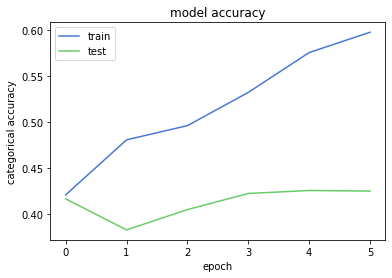

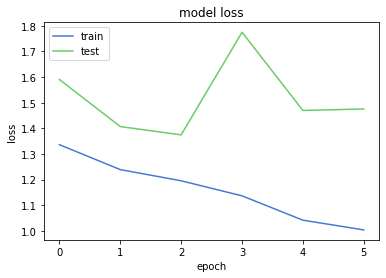

In [161]:
plot_history(model_1d_session_based_hist)

In [162]:
pred_y_session_based = model_1d_session_based.predict(X_test_session_based_cnn)

In [163]:
pred_y_session_based.shape

(1646, 6)

In [164]:
#pred_y_split = np.argmax(pred_y_split,axis=1)

In [165]:
#pred_y_split.shape

In [166]:
#pred_y_split.shape

Test Set Accuracy =  0.427
Test Set F-score =  0.248
Test Set Precision =  0.312
Test Set Recall =  0.244
Confusion matrix, without normalization
[[ 46  31  79   0   0  12]
 [  7 112 265   0   0  58]
 [ 14  68 479   0   0  63]
 [  0   2   7   0   0   1]
 [  0   3  14   0   0   1]
 [  2  33 283   0   0  66]]


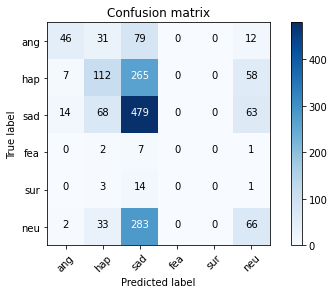

In [167]:
display_results(y_test_session_based, pred_y_session_based)

In [168]:
#from sklearn.metrics import balanced_accuracy_score

In [169]:
#balanced_accuracy_score(y_test_split, np.argmax(pred_y_split,axis=1))

In [170]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [171]:
from datetime import datetime

In [172]:
curr_dt_time = datetime.now()
local_filepath = output_dir + '/' +'model_init_2d_session' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=False)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [173]:
X_train_session_based_cnn_2d = np.expand_dims(X_train_session_based_cnn, -1)
X_val_session_based_cnn_2d = np.expand_dims(X_val_session_based_cnn, -1)
X_test_session_based_cnn_2d = np.expand_dims(X_test_session_based_cnn, -1)

In [174]:
X_train_session_based_cnn.shape

(4339, 188, 1)

In [175]:
#ip = tf.keras.layers.Input(shape=X_train_split_cnn[0].shape)

model_session_based_2d = Sequential()
model_session_based_2d.add(Conv2D(256,5,padding='same',input_shape=(X_train_session_based_cnn.shape[1],1,1))) #(x_train_mfcc_cnn_2d[0].shape))) # there are 8 features
model_session_based_2d.add(Activation('relu'))
model_session_based_2d.add(Conv2D(128,5,padding='same'))
model_session_based_2d.add(Dropout(0.1))
#model_mfcc_2d.add(MaxPooling2D(pool_size=(2)))
model_session_based_2d.add(Conv2D(128,5,padding='same'))
model_session_based_2d.add(Activation('relu'))
model_session_based_2d.add(Flatten())
model_session_based_2d.add(Dense(6))
model_session_based_2d.add(Activation('softmax'))
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)

In [176]:
model_session_based_2d.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['sparse_categorical_accuracy'])
model_history_session_based_2d = model_session_based_2d.fit(X_train_session_based_cnn_2d, 
              y_train_session_based,
              epochs=30,
              batch_size=32,
              validation_data=(X_val_session_based_cnn_2d, y_val_session_based),
              callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
136/136 [==============================] - 3s 17ms/step - loss: 1.3142 - sparse_categorical_accuracy: 0.4563 - val_loss: 1.3330 - val_sparse_categorical_accuracy: 0.4291
Epoch 2/30
136/136 [==============================] - 2s 15ms/step - loss: 1.1976 - sparse_categorical_accuracy: 0.5031 - val_loss: 1.4020 - val_sparse_categorical_accuracy: 0.3908

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 3/30
136/136 [==============================] - 2s 15ms/step - loss: 1.1017 - sparse_categorical_accuracy: 0.5563 - val_loss: 1.4196 - val_sparse_categorical_accuracy: 0.3914

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 4/30
136/136 [==============================] - 2s 15ms/step - loss: 1.0770 - sparse_categorical_accuracy: 0.5628 - val_loss: 1.4241 - val_sparse_categorical_accuracy: 0.3966

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 00004: early stopping


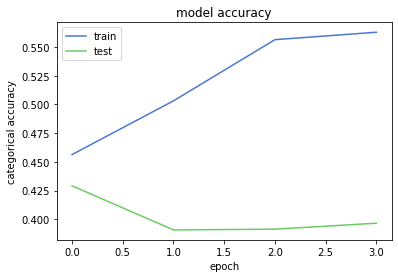

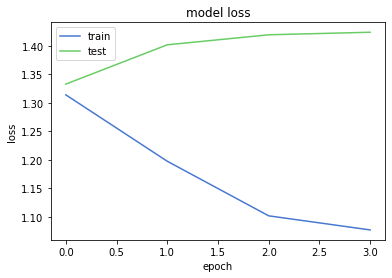

In [177]:
plot_history(model_history_session_based_2d)

In [178]:
pred_y_2d_session_based = model_session_based_2d.predict(X_test_session_based_cnn_2d)

Test Set Accuracy =  0.400
Test Set F-score =  0.247
Test Set Precision =  0.303
Test Set Recall =  0.254
Confusion matrix, without normalization
[[ 57  14  67   0   0  30]
 [ 14  47 181   0   0 200]
 [ 22  23 361   0   0 218]
 [  0   0   8   0   0   2]
 [  1   2  11   0   0   4]
 [  5   9 177   0   0 193]]


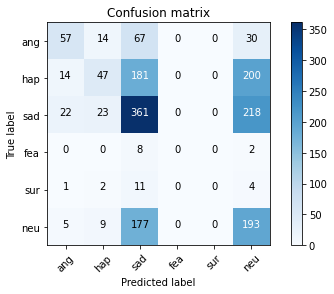

In [179]:
display_results(y_test_session_based, pred_y_2d_session_based)

In [180]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [181]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_dbert_sb = tokenizer_class.from_pretrained(pretrained_weights)
model_dbert_session_based = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [182]:
max_val = 0
for sent in (X_train_session_based['transcription'].tolist() + X_test_session_based['transcription'].tolist() + X_val_session_based['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_dbert_sb.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 114


In [183]:
from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [184]:
MODEL_NAME = 'distilbert-base-uncased'

In [185]:
MAX_LENGTH = 114

tokenizer_dbert_sb = DistilBertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

# def tokenize(sentences, tokenizer):
#     input_ids, input_masks, input_segments = [], [], []
#     for sentence in tqdm(sentences):
#         inputs = tokenizer.encode_plus(sentence, 
#                                        add_special_tokens=True, 
#                                        max_length=MAX_LENGTH, 
#                                        pad_to_max_length=True, 
#                                        return_attention_mask=True, 
#                                        return_token_type_ids=True, 
#                                        truncation=True)
#         input_ids.append(inputs['input_ids'])
#         input_masks.append(inputs['attention_mask'])
#         input_segments.append(inputs['token_type_ids'])        
#        
#    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [186]:
X_train_dbert_session_based_text = tokenize(X_train_session_based['transcription'], tokenizer_dbert_sb)
X_test_dbert_session_based_text = tokenize(X_test_session_based['transcription'], tokenizer_dbert_sb)
X_val_dbert_session_based_text = tokenize(X_val_session_based['transcription'], tokenizer_dbert_sb)

100%|██████████| 1538/1538 [00:00<00:00, 2340.59it/s]


In [187]:
config_dbert_sb = DistilBertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
DistilBERT_sb = TFDistilBertModel.from_pretrained(MODEL_NAME, config=config_dbert_sb)

input_ids_in_dbert_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_dbert_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_dbert_sb = DistilBERT_sb(input_ids = input_ids_in_dbert_sb, attention_mask = input_masks_in_dbert_sb)[0]
X_dbert_sb = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_dbert_sb)
X_dbert_sb = tf.keras.layers.GlobalMaxPool1D()(X_dbert_sb)
X_dbert_sb = tf.keras.layers.Dense(64, activation='relu')(X_dbert_sb)
X_dbert_sb = tf.keras.layers.Dropout(0.2)(X_dbert_sb)
X_dbert_sb = tf.keras.layers.Dense(6, activation='softmax')(X_dbert_sb)

model_dbert_session_based = tf.keras.Model(inputs=[input_ids_in_dbert_sb, input_masks_in_dbert_sb], outputs = X_dbert_sb)

for layer in model_dbert_session_based.layers[:3]:
    layer.trainable = False

model_dbert_session_based.summary()

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'vocab_layer_norm', 'vocab_projector', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_distil_bert_model_1 (TFDisti TFBaseModelOutput(la 66362880    input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 114, 256)     918528      tf_distil_bert_model_1[0][1

In [188]:
curr_dt_time = datetime.now()
local_filepath = output_dir + '/' + 'model_init_dbert_sb' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'

model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [189]:
y_val_session_based.shape

(1538,)

In [190]:
model_dbert_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_dbert_session_based = model_dbert_session_based.fit(X_train_dbert_session_based_text, 
                    y_train_session_based, 
                    epochs = 25,
                    batch_size=32, 
                    validation_data=(X_val_dbert_session_based_text, y_val_session_based), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/25
136/136 [==============================] - 27s 145ms/step - loss: 1.3047 - sparse_categorical_accuracy: 0.4683 - val_loss: 1.2082 - val_sparse_categorical_accuracy: 0.4870
Epoch 2/25
136/136 [==============================] - 18s 132ms/step - loss: 1.1575 - sparse_categorical_accuracy: 0.5243 - val_loss: 1.2067 - val_sparse_categorical_accuracy: 0.4948

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 3/25
136/136 [==============================] - 18s 132ms/step - loss: 1.0490 - sparse_categorical_accuracy: 0.5750 - val_loss: 1.1583 - val_sparse_categorical_accuracy: 0.5000
Epoch 4/25
136/136 [==============================] - 18s 132ms/step - loss: 1.0014 - sparse_categorical_accuracy: 0.5988 - val_loss: 1.1676 - val_sparse_categorical_accuracy: 0.5150

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 5/25
136/136 [==============================] - 18s 132ms/step - loss: 0.9747 - sparse_categorical

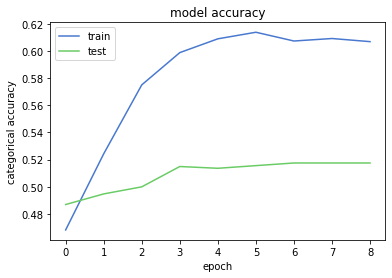

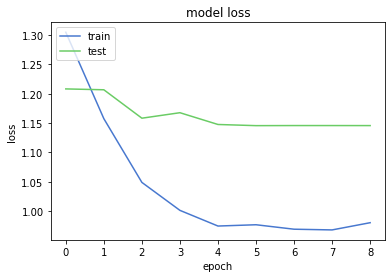

In [191]:
plot_history(model_history_dbert_session_based)

In [192]:
pred_y_dbert_session_based = model_dbert_session_based.predict(X_test_dbert_session_based_text)

Test Set Accuracy =  0.582
Test Set F-score =  0.369
Test Set Precision =  0.380
Test Set Recall =  0.365
Confusion matrix, without normalization
[[ 68  12  65   0   0  23]
 [ 12 237 107   0   0  86]
 [ 49  45 450   0   0  80]
 [  0   2   6   0   0   2]
 [  3   3  10   0   0   2]
 [ 12  33 136   0   0 203]]


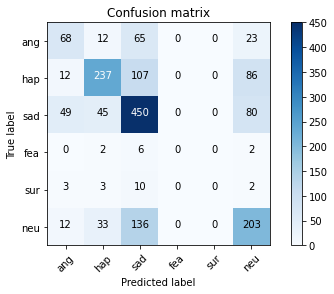

In [193]:
display_results(y_test_session_based,pred_y_dbert_session_based)

In [194]:
# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_bert_sb = tokenizer_class.from_pretrained(pretrained_weights)
model_bert_session_based = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [195]:
max_val = 0
for sent in (X_train_session_based['transcription'].tolist() + X_test_session_based['transcription'].tolist() + X_val_session_based['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_bert_sb.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 114


In [196]:
#from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [197]:
MODEL_NAME = 'bert-base-uncased'

In [198]:
MAX_LENGTH = 114

tokenizer_bert_sb = BertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

# def tokenize(sentences, tokenizer):
#     input_ids, input_masks, input_segments = [], [], []
#     for sentence in tqdm(sentences):
#         inputs = tokenizer.encode_plus(sentence, 
#                                        add_special_tokens=True, 
#                                        max_length=MAX_LENGTH, 
#                                        pad_to_max_length=True, 
#                                        return_attention_mask=True, 
#                                        return_token_type_ids=True, 
#                                        truncation=True)
#         input_ids.append(inputs['input_ids'])
#         input_masks.append(inputs['attention_mask'])
#         input_segments.append(inputs['token_type_ids'])        
#        
#    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [199]:
X_train_bert_session_based_text = tokenize(X_train_session_based['transcription'], tokenizer_bert_sb)
X_test_bert_session_based_text = tokenize(X_test_session_based['transcription'], tokenizer_bert_sb)
X_val_bert_session_based_text = tokenize(X_val_session_based['transcription'], tokenizer_bert_sb)

100%|██████████| 1538/1538 [00:00<00:00, 2269.25it/s]


In [200]:
config_bert_sb = BertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
BERT_sb = TFBertModel.from_pretrained(MODEL_NAME, config=config_bert_sb)

input_ids_in_bert_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_bert_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_bert_sb = BERT_sb(input_ids = input_ids_in_bert_sb, attention_mask = input_masks_in_bert_sb)[0]
X_bert_sb = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_bert_sb)
X_bert_sb = tf.keras.layers.GlobalMaxPool1D()(X_bert_sb)
X_bert_sb = tf.keras.layers.Dense(64, activation='relu')(X_bert_sb)
X_bert_sb = tf.keras.layers.Dropout(0.2)(X_bert_sb)
X_bert_sb = tf.keras.layers.Dense(6, activation='softmax')(X_bert_sb)

model_bert_session_based = tf.keras.Model(inputs=[input_ids_in_bert_sb, input_masks_in_bert_sb], outputs = X_bert_sb)

for layer in model_bert_session_based.layers[:3]:
    layer.trainable = False

model_bert_session_based.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_bert_model_1 (TFBertModel)   TFBaseModelOutputWit 109482240   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_4 (Bidirectional) (None, 114, 256)     918528      tf_bert_model_1[0][25]     

In [201]:
curr_dt_time = datetime.now()
local_filepath = output_dir + '/' + 'model_init_bert_sb' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [202]:
y_val_session_based.shape

(1538,)

In [203]:
model_bert_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_bert_session_based = model_bert_session_based.fit(X_train_bert_session_based_text, 
                    y_train_session_based, 
                    epochs = 30,
                    batch_size=32, 
                    validation_data=(X_val_bert_session_based_text, y_val_session_based), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
136/136 [==============================] - 50s 267ms/step - loss: 1.2827 - sparse_categorical_accuracy: 0.4490 - val_loss: 1.1980 - val_sparse_categorical_accuracy: 0.4941
Epoch 2/30
136/136 [==============================] - 33s 245ms/step - loss: 1.1238 - sparse_categorical_accuracy: 0.5414 - val_loss: 1.1971 - val_sparse_categorical_accuracy: 0.4720

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 3/30
136/136 [==============================] - 33s 246ms/step - loss: 0.9913 - sparse_categorical_accuracy: 0.6022 - val_loss: 1.0854 - val_sparse_categorical_accuracy: 0.5507
Epoch 4/30
136/136 [==============================] - 33s 246ms/step - loss: 0.9507 - sparse_categorical_accuracy: 0.6193 - val_loss: 1.0747 - val_sparse_categorical_accuracy: 0.5475
Epoch 5/30
136/136 [==============================] - 33s 246ms/step - loss: 0.9221 - sparse_categorical_accuracy: 0.6329 - val_loss: 1.0959 - val_sparse_categorical_accuracy: 0.5514

Ep

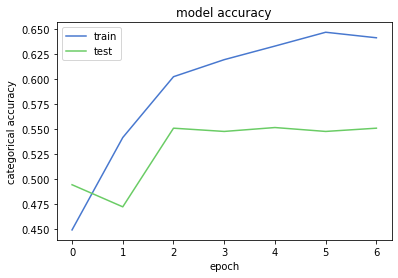

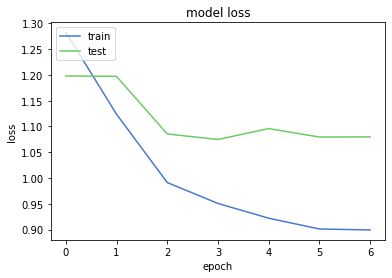

In [204]:
plot_history(model_history_bert_session_based)

In [205]:
pred_y_bert_session_based = model_bert_session_based.predict(X_test_bert_session_based_text)

Test Set Accuracy =  0.609
Test Set F-score =  0.423
Test Set Precision =  0.452
Test Set Recall =  0.409
Confusion matrix, without normalization
[[ 73  10  65   0   0  20]
 [ 13 254  97   0   4  74]
 [ 35  42 472   0   1  74]
 [  1   2   7   0   0   0]
 [  3   3   9   0   3   0]
 [  8  47 127   0   2 200]]


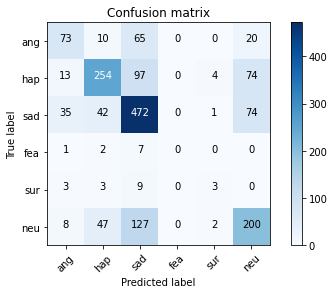

In [206]:
display_results(y_test_session_based,pred_y_bert_session_based)

In [207]:
# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want RoBERTa instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.RobertaModel, ppb.RobertaTokenizer, 'roberta-base')

# Load pretrained model/tokenizer
tokenizer_roberta_sb = tokenizer_class.from_pretrained(pretrained_weights)
model_roberta_session_based = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [208]:
max_val = 0
for sent in (X_train_session_based['transcription'].tolist() + X_test_session_based['transcription'].tolist() + X_val_session_based['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_roberta_sb.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 119


In [209]:
#from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [210]:
MODEL_NAME = 'roberta-base'

In [211]:
MAX_LENGTH = 119

tokenizer_robert_sb = RobertaTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

# def tokenize(sentences, tokenizer):
#     input_ids, input_masks, input_segments = [], [], []
#     for sentence in tqdm(sentences):
#         inputs = tokenizer.encode_plus(sentence, 
#                                        add_special_tokens=True, 
#                                        max_length=MAX_LENGTH, 
#                                        pad_to_max_length=True, 
#                                        return_attention_mask=True, 
#                                        return_token_type_ids=True, 
#                                        truncation=True)
#         input_ids.append(inputs['input_ids'])
#         input_masks.append(inputs['attention_mask'])
#         input_segments.append(inputs['token_type_ids'])        
#        
#    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [212]:
X_train_roberta_session_based_text = tokenize(X_train_session_based['transcription'], tokenizer_roberta_sb)
X_test_roberta_session_based_text = tokenize(X_test_session_based['transcription'], tokenizer_roberta_sb)
X_val_roberta_session_based_text = tokenize(X_val_session_based['transcription'], tokenizer_roberta_sb)

100%|██████████| 1538/1538 [00:00<00:00, 4557.71it/s]


In [213]:
config_roberta_sb = RobertaConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
RoBERTa_sb = TFRobertaModel.from_pretrained(MODEL_NAME, config=config_roberta_sb)

input_ids_in_roberta_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_roberta_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_roberta_sb = RoBERTa_sb(input_ids = input_ids_in_roberta_sb, attention_mask = input_masks_in_roberta_sb)[0]
X_roberta_sb = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_roberta_sb)
X_roberta_sb = tf.keras.layers.GlobalMaxPool1D()(X_roberta_sb)
X_roberta_sb = tf.keras.layers.Dense(64, activation='relu')(X_roberta_sb)
X_roberta_sb = tf.keras.layers.Dropout(0.2)(X_roberta_sb)
X_roberta_sb = tf.keras.layers.Dense(6, activation='softmax')(X_roberta_sb)

model_roberta_session_based = tf.keras.Model(inputs=[input_ids_in_roberta_sb, input_masks_in_roberta_sb], outputs = X_roberta_sb)

for layer in model_roberta_session_based.layers[:3]:
    layer.trainable = False

model_roberta_session_based.summary()

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 119)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 119)]        0                                            
__________________________________________________________________________________________________
tf_roberta_model_1 (TFRobertaMo TFBaseModelOutputWit 124645632   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_5 (Bidirectional) (None, 119, 256)     918528      tf_roberta_model_1[0][25]  

In [214]:
curr_dt_time = datetime.now()
local_filename = output_dir + '/' + 'model_init_roberta_sb' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [215]:
y_val_session_based.shape

(1538,)

In [216]:
model_roberta_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_roberta_session_based = model_roberta_session_based.fit(X_train_roberta_session_based_text, 
                    y_train_session_based, 
                    epochs = 30,
                    batch_size=32, 
                    validation_data=(X_val_roberta_session_based_text, y_val_session_based), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
136/136 [==============================] - 50s 270ms/step - loss: 1.4225 - sparse_categorical_accuracy: 0.3731 - val_loss: 1.2822 - val_sparse_categorical_accuracy: 0.4681
Epoch 2/30
136/136 [==============================] - 34s 250ms/step - loss: 1.2595 - sparse_categorical_accuracy: 0.4729 - val_loss: 1.2161 - val_sparse_categorical_accuracy: 0.4902
Epoch 3/30
136/136 [==============================] - 34s 251ms/step - loss: 1.1552 - sparse_categorical_accuracy: 0.5393 - val_loss: 1.1772 - val_sparse_categorical_accuracy: 0.5078
Epoch 4/30
136/136 [==============================] - 34s 250ms/step - loss: 1.0743 - sparse_categorical_accuracy: 0.5651 - val_loss: 1.1891 - val_sparse_categorical_accuracy: 0.5150

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/30
136/136 [==============================] - 34s 251ms/step - loss: 0.9684 - sparse_categorical_accuracy: 0.6236 - val_loss: 1.1576 - val_sparse_categorical_accuracy: 0.5221
Epo

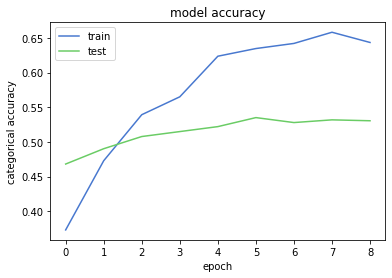

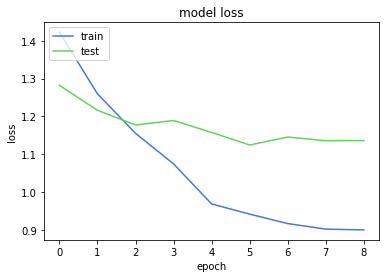

In [217]:
plot_history(model_history_roberta_session_based)

In [218]:
pred_y_roberta_session_based = model_roberta_session_based.predict(X_test_roberta_session_based_text)

Test Set Accuracy =  0.584
Test Set F-score =  0.379
Test Set Precision =  0.383
Test Set Recall =  0.377
Confusion matrix, without normalization
[[ 82  12  61   0   0  13]
 [ 17 256  95   0   0  74]
 [ 47  55 427   0   0  95]
 [  0   2   7   0   0   1]
 [  3   3   8   0   0   4]
 [ 14  36 137   0   0 197]]


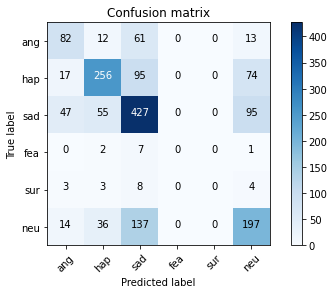

In [219]:
display_results(y_test_session_based,pred_y_roberta_session_based)

In [ ]:
### Ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
model_1d_name = output_dir+'/model_init_1d/'+'model-00007-0.55297-1.09585-0.49086-1.263382021-10-1607_34_17.890873.h5'
model_2d_name = output_dir +'/model_init_2d/' + 'model-00009-0.56502-1.06881-0.49169-1.225792021-10-1607_42_54.843947.h5'
#model_dbert_name = 

In [ ]:
model_1d_ens = keras.models.load_model(model_1d_name)
model_2d_ens = keras.models.load_model(model_2d_name)

In [ ]:
y_ens_1d_pred = model_1d_ens.predict(X_test_split_cnn)

In [ ]:
y_ens_2d_pred = model_2d_ens.predict(X_test_split_cnn_2d)

In [ ]:
config_db_split_ens = DistilBertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
DistilBERT_split_ens = TFDistilBertModel.from_pretrained(MODEL_NAME, config=config_db_split_ens)

input_ids_in_db_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_db_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_db_split = DistilBERT_split_ens(input_ids = input_ids_in_db_split, attention_mask = input_masks_in_db_split)[0]
X_db_split = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_db_split)
X_db_split = tf.keras.layers.GlobalMaxPool1D()(X_db_split)
X_db_split = tf.keras.layers.Dense(64, activation='relu')(X_db_split)
X = tf.keras.layers.Dropout(0.2)(X_db_split)
X_db_split = tf.keras.layers.Dense(6, activation='softmax')(X_db_split)

model_dbert_split_ens = tf.keras.Model(inputs=[input_ids_in_db_split, input_masks_in_db_split], outputs = X_db_split)

#for layer in model_dbert_split_ens.layers[:3]:
#    layer.trainable = False

model_dbert_split_ens.summary()

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'activation_13', 'vocab_projector', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_distil_bert_model_1 (TFDisti TFBaseModelOutput(la 66362880    input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 114, 256)     918528      tf_distil_bert_model_1[0][13]

In [ ]:
model_dbert_split_ens.load_weights(output_dir+'/model_init_dbert_split/'+'model-00005-0.67532-0.80067-0.59635-1.027872021-10-1608_09_36.624446.h5')

In [ ]:
y_ens_dbert_split_pred = model_dbert_split_ens(X_test_dbert_split_text)

In [ ]:
config_bert_split_ens = BertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
BERT_split_ens = TFBertModel.from_pretrained(MODEL_NAME, config=config_bert_sb_ens)

input_ids_in_bert_split_ens = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_bert_split_ens = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_bert_split_ens = BERT_sb(input_ids = input_ids_in_bert_split_ens, attention_mask = input_masks_in_bert_split_ens)[0]
X_bert_split_ens = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_bert_split_ens)
X_bert_split_ens = tf.keras.layers.GlobalMaxPool1D()(X_bert_split_ens)
X_bert_split_ens = tf.keras.layers.Dense(64, activation='relu')(X_bert_split_ens)
X_bert_split_ens = tf.keras.layers.Dropout(0.2)(X_bert_split_ens)
X_bert_split_ens = tf.keras.layers.Dense(6, activation='softmax')(X_bert_split_ens)

model_bert_split_ens = tf.keras.Model(inputs=[input_ids_in_bert_split_ens, input_masks_in_bert_split_ens], outputs = X_bert_split_ens)

#for layer in model_bert_session_based.layers[:3]:
#    layer.trainable = False

model_bert_split_ens.summary()

In [ ]:
model_bert_split_ens.load_weights(output_dir+'/model_init_bert_split/model-00012-0.73868-0.67929-0.63455-0.963092021-10-1608_18_20.876536

In [ ]:
y_ens_all_pred = array([y_ens_1d_pred,y_ens_2d_pred,y_ens_dbert_split_pred])

In [ ]:
y_ens_summed_pred = tensordot(y_ens_all_pred, [1,3,6], axes=((0),(0)))

In [ ]:
y_ens_summed_pred.shape

(1505, 6)

Test Set Accuracy =  0.630
Test Set F-score =  0.452
Test Set Precision =  0.506
Test Set Recall =  0.435
Confusion matrix, without normalization
[[ 74  15 111   0   6  14]
 [  0 221  69   0   3  34]
 [ 17  27 465   0   1  76]
 [  0   2   5   0   0   1]
 [  3   4   5   0   6   4]
 [  0  33 125   0   2 182]]


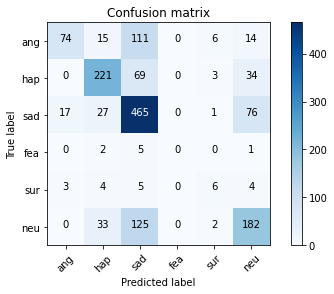

In [ ]:
display_results(y_test_split,y_ens_summed_pred)

In [ ]:
model_combined_split_db_1 = VotingClassifier(estimators=[('m1ds', model_1d_ens), ('m2ds', model_2d_ens)], voting='soft')

In [ ]:
model_combined_split_db_1.predict_proba(X_train_split)